In [3]:
#DEA

import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
# 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os.path

In [4]:
%matplotlib inline
import matplotlib # 注意这个也要import一次
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize # import figsize
figsize(12.5, 4) # 设置 figsize
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率

In [109]:
srcpath='H:\\12_Kaggle\\toollife\\pythonProject\\PreProcessed'

srcplc="PLC_Summary.csv"
srcsensor="Sensor_Summary_ALL.csv"
all="All_1min_Additional_Orig_PlusLife_109row_lean.csv"
all="All_1min_Additional_Orig_PlusLife.csv"

all="All_1min_Additional_Orig_PlusFeatures_OutliersRemoved.csv"
all="All_1s_Feature.csv"

pathsensor=os.path.join(srcpath,srcsensor)
pathplc=os.path.join(srcpath,srcplc)

allpath=os.path.join(srcpath,all)

In [110]:
df=pd.read_csv(allpath)

In [126]:
df.columns

Index(['Unnamed: 0', 'm', 'csv', 'sec', 'duration', 'c', 'spindle_load_mean',
       'sl_std', 'sl_min', 'sl_25', 'sl_50', 'sl_75', 'sl_max', 'x_disp_max',
       'x_disp_mean', 'x_disp_sum', 'y_disp_max', 'y_disp_mean', 'y_disp_sum',
       'z_disp_max', 'z_disp_mean', 'z_disp_sum', 'x_move_count',
       'y_move_count', 'z_move_count', 'all_displacement', 'c1', 'v1_mean',
       'v1_std', 'v1_min', 'v1_25', 'v1_50', 'v1_75', 'v1_max', 'c2',
       'v2_mean', 'v2_std', 'v2_min', 'v2_25', 'v1_50.1', 'v2_75', 'v2_max',
       'c3', 'v3_mean', 'v3_std', 'v3_min', 'v3_25', 'v3_50', 'v3_75',
       'v3_max', 'c4', 'cu_mean', 'cu_std', 'cu_min', 'cu_25', 'cu_50',
       'cu_75', 'cu_max', 'v1_rms', 'v1_Xp', 'v1_Ip', 'v1_Cf', 'v1_Ce',
       'v1_Cw', 'v1_Cq', 'v2_rms', 'v2_Xp', 'v2_Ip', 'v2_Cf', 'v2_Ce', 'v2_Cw',
       'v2_Cq', 'v3_rms', 'v3_Xp', 'v3_Ip', 'v3_Cf', 'v3_Ce', 'v3_Cw', 'v3_Cq',
       'life'],
      dtype='object')

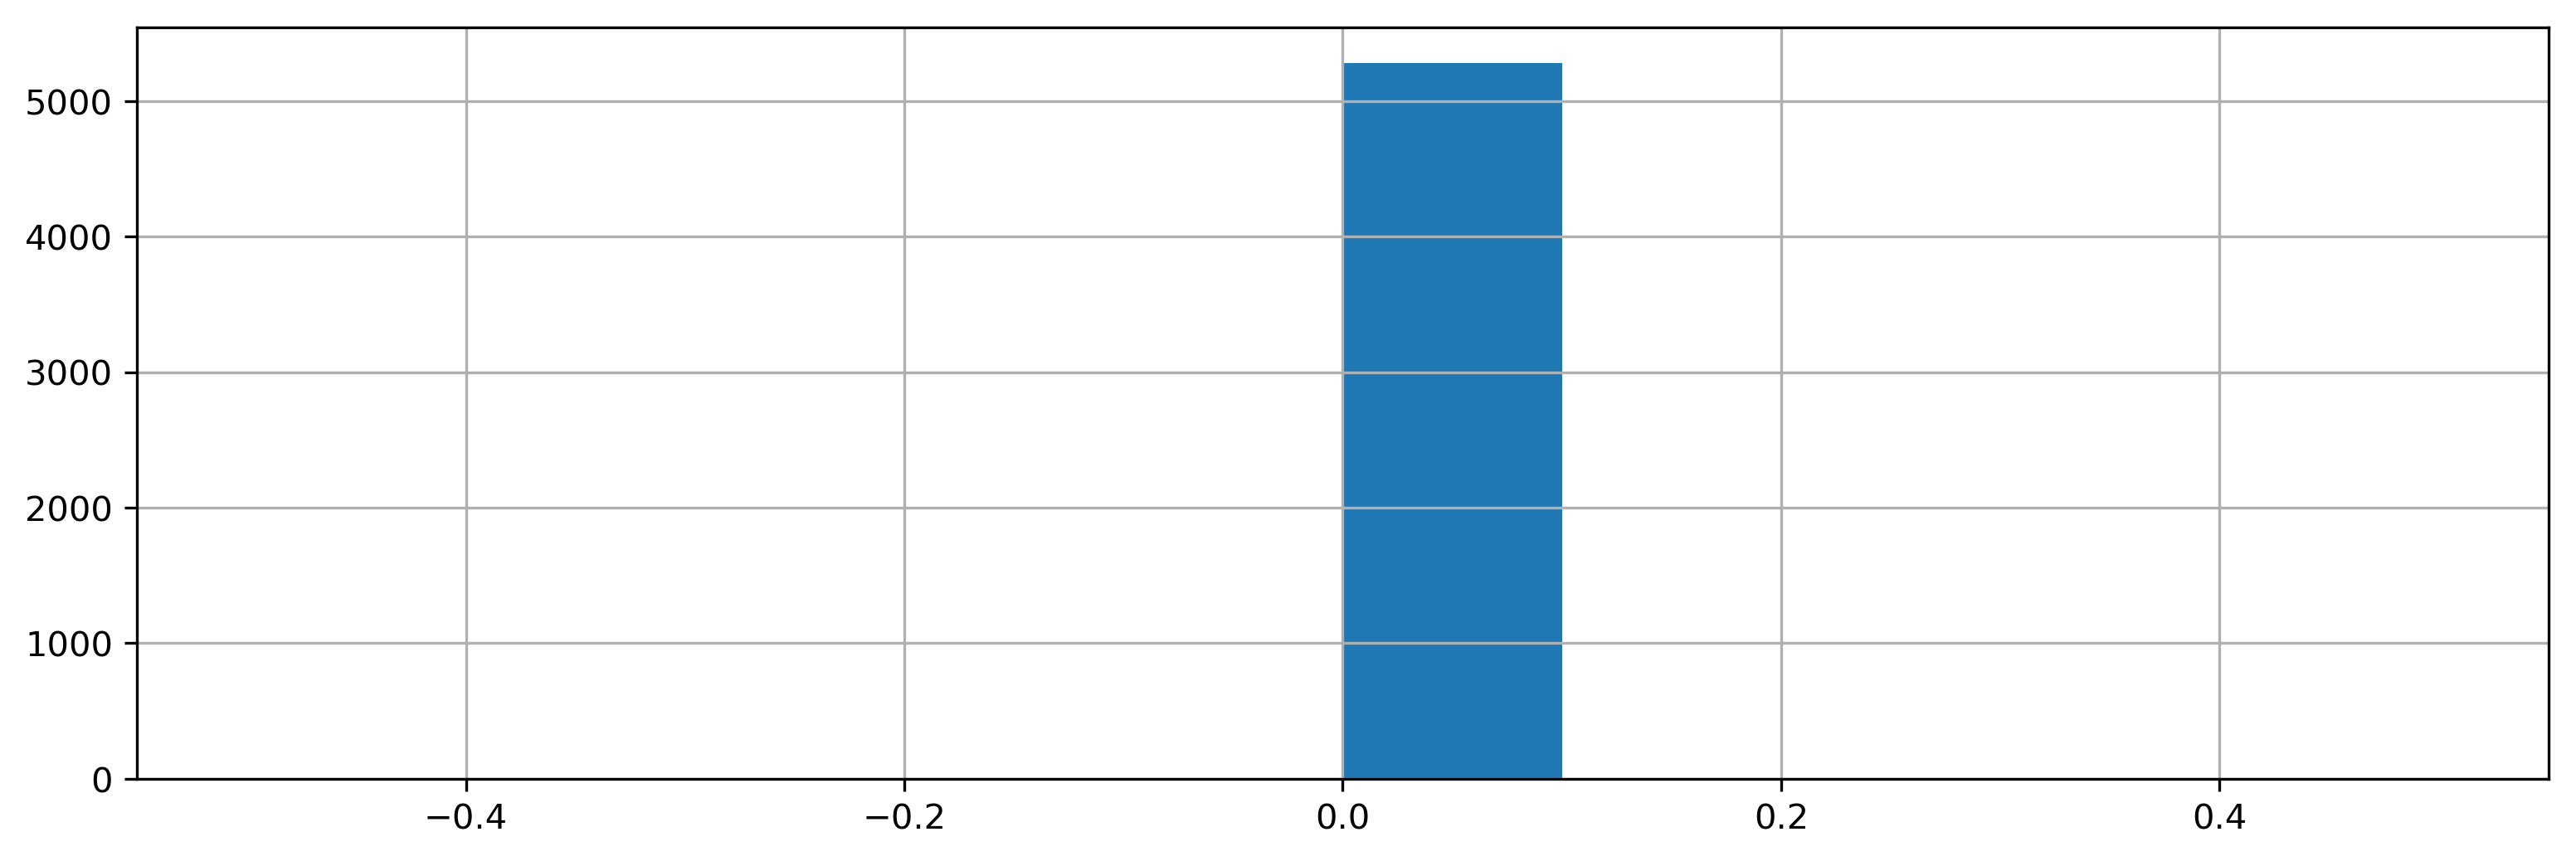

In [128]:
df_noz['z_move_count'].hist()

In [113]:
df_noz=df_noz[df_noz['duration']>=-1.02]
df_noz=df_noz[df_noz['duration']<=-0.98]

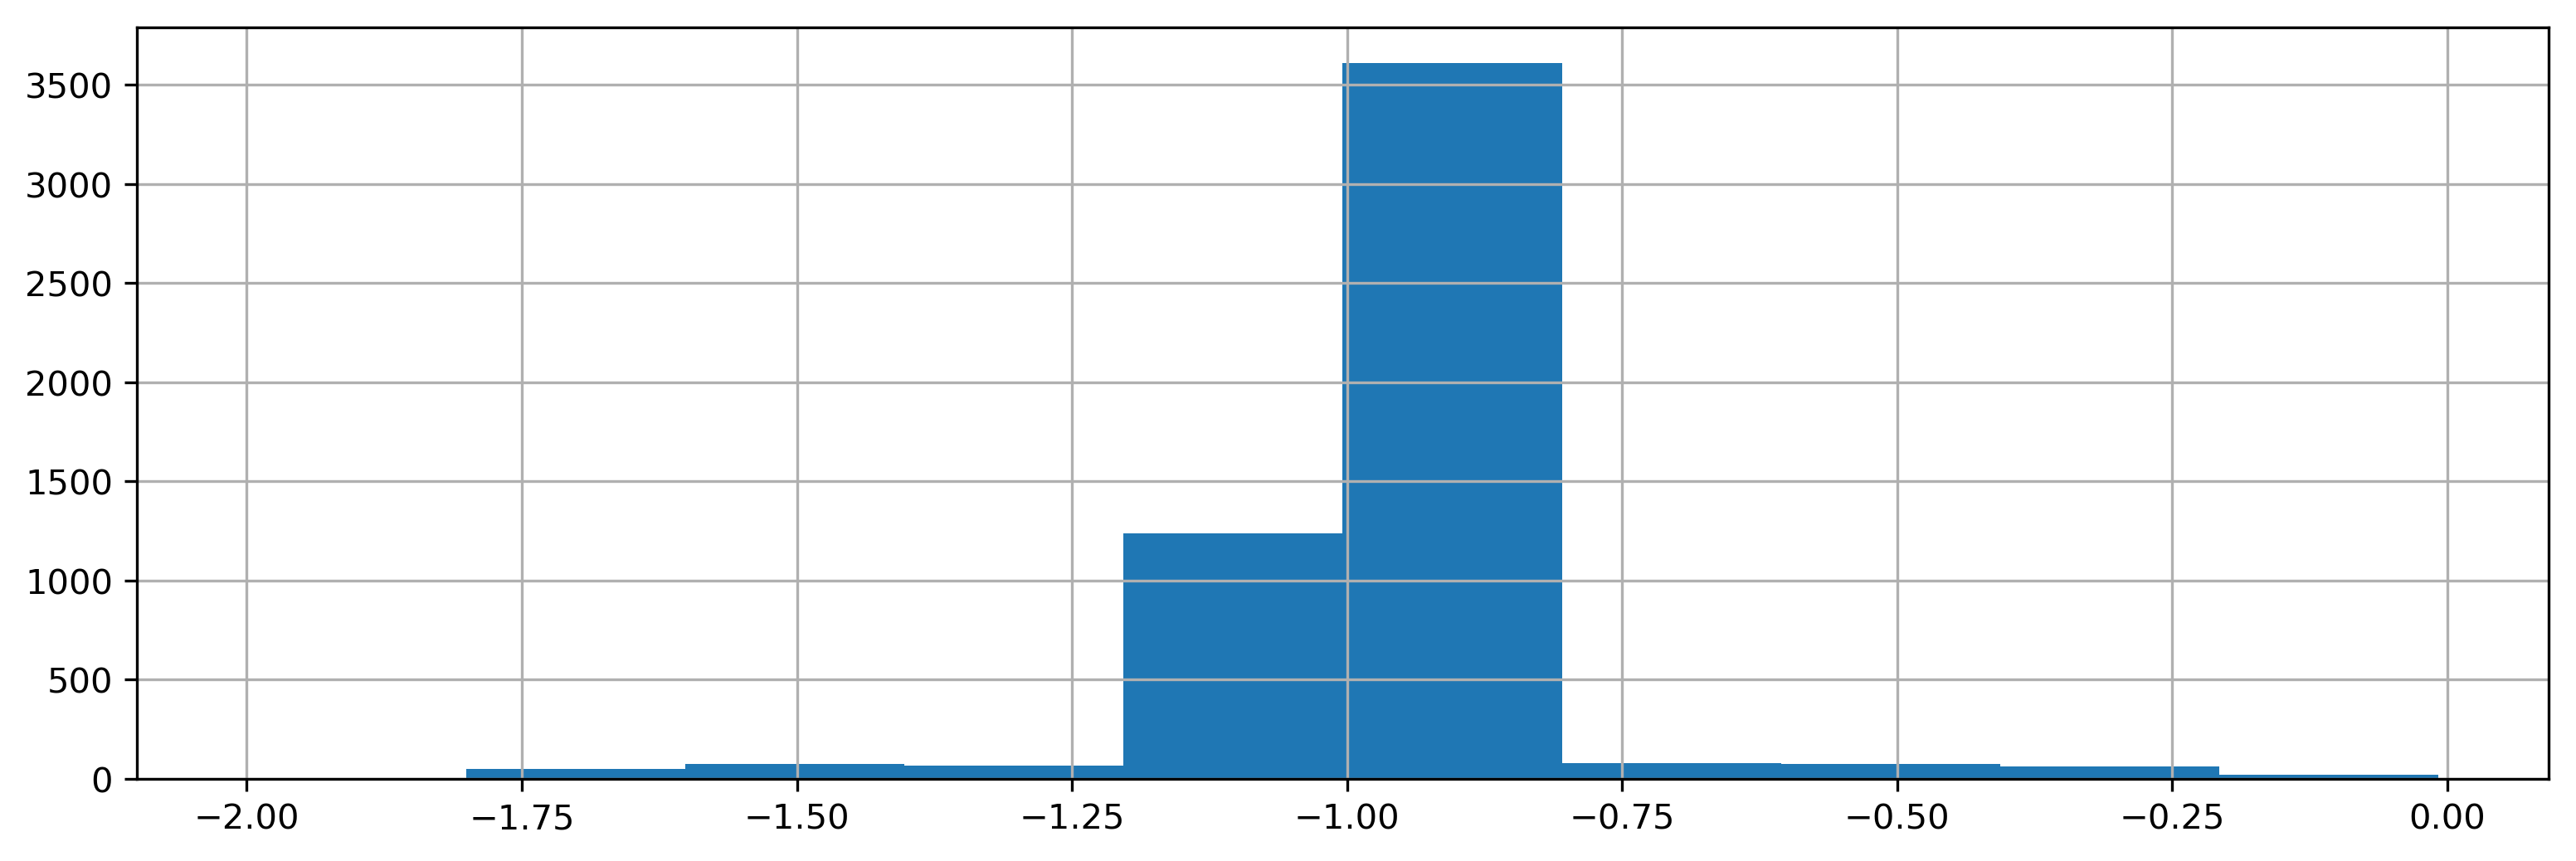

In [129]:
df_noz['duration'].hist()


In [121]:
df_noz=df[df['z_move_count']==0]
df_all=df

In [130]:
df_noz.corr()['life']
df_noz.corr().abs().sort('life')['life']

C:\Users\Zhitao\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


duration             0.000695
v2_Cf                0.001921
v3_mean              0.002101
v2_Ce                0.003186
v3_Ce                0.005230
v3_Cw                0.005378
v3_Cf                0.005628
c                    0.007719
v2_Cw                0.008184
y_disp_max           0.018014
v1_Ip                0.020950
sec                  0.022492
y_disp_sum           0.023168
v3_50                0.023819
all_displacement     0.030157
v3_Cq                0.037213
x_move_count         0.040347
v1_50                0.044684
v2_Cq                0.047018
x_disp_mean          0.047422
v3_rms               0.052407
y_disp_mean          0.052919
v1_Cq                0.058218
v1_Cf                0.058561
y_move_count         0.058864
x_disp_sum           0.059012
v3_max               0.059982
v3_Xp                0.062360
c1                   0.064458
c3                   0.064458
                       ...   
v3_25                0.125277
v2_min               0.128517
v1_50.1   

In [199]:
df0=df_noz[df_noz['m']==0]

# 对于一个m=0，新添加一些特征，是否有关系

In [200]:
#特征1，位移量是否和振动rms的关系
df0['disp_div_v1_rms']=df0['all_displacement']/df0['v1_rms']
df0['x_disp_div_v1_rms']=df0['x_disp_sum']/df0['v1_rms']

C:\Users\Zhitao\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Zhitao\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


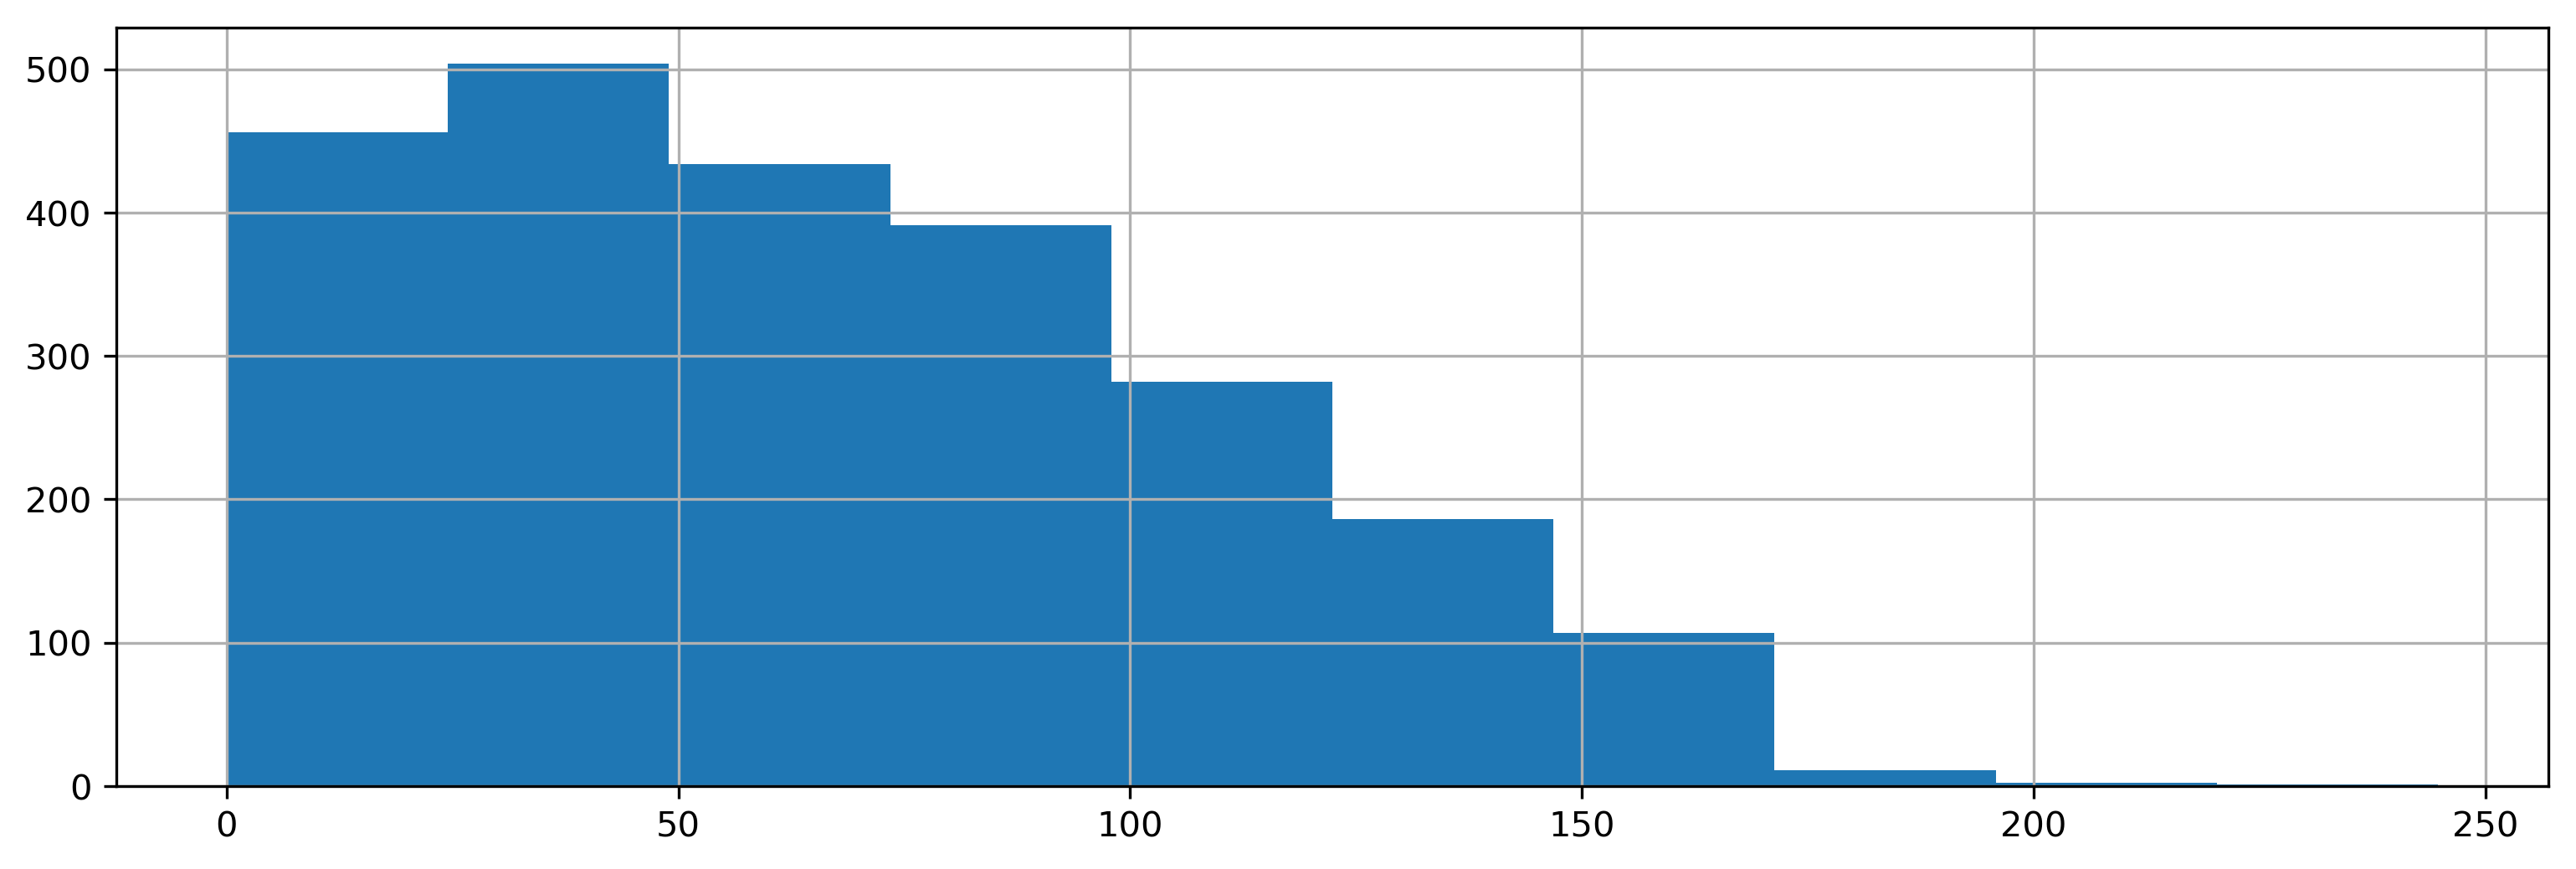

In [202]:
df0['x_disp_sum'].hist()

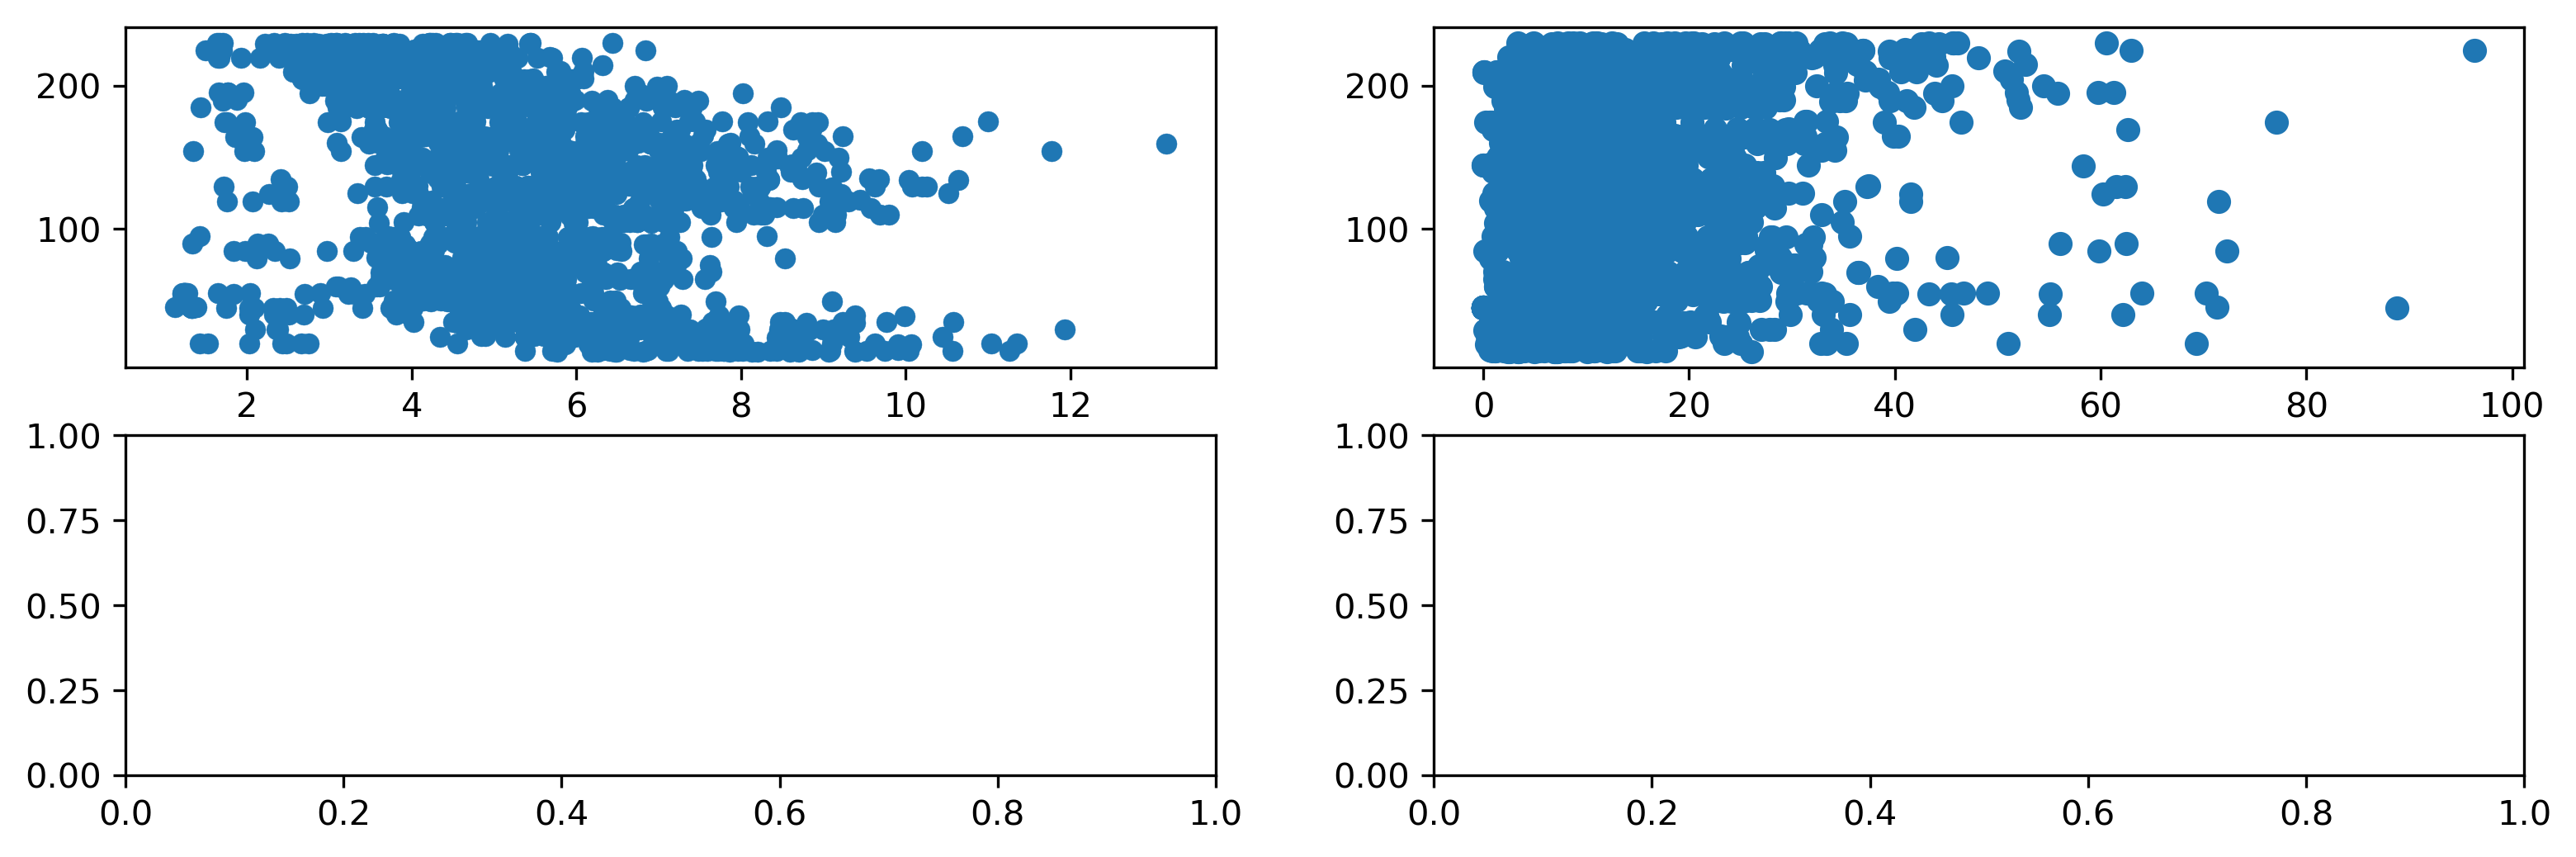

In [193]:
fig,ax=plt.subplots(2,2)
ax=ax.flatten()
ax[0].scatter(df0['v1_rms'],df0['life'],linewidths=0.1)
ax[1].scatter(df0['x_disp_div_v1_rms'],df0['life'])

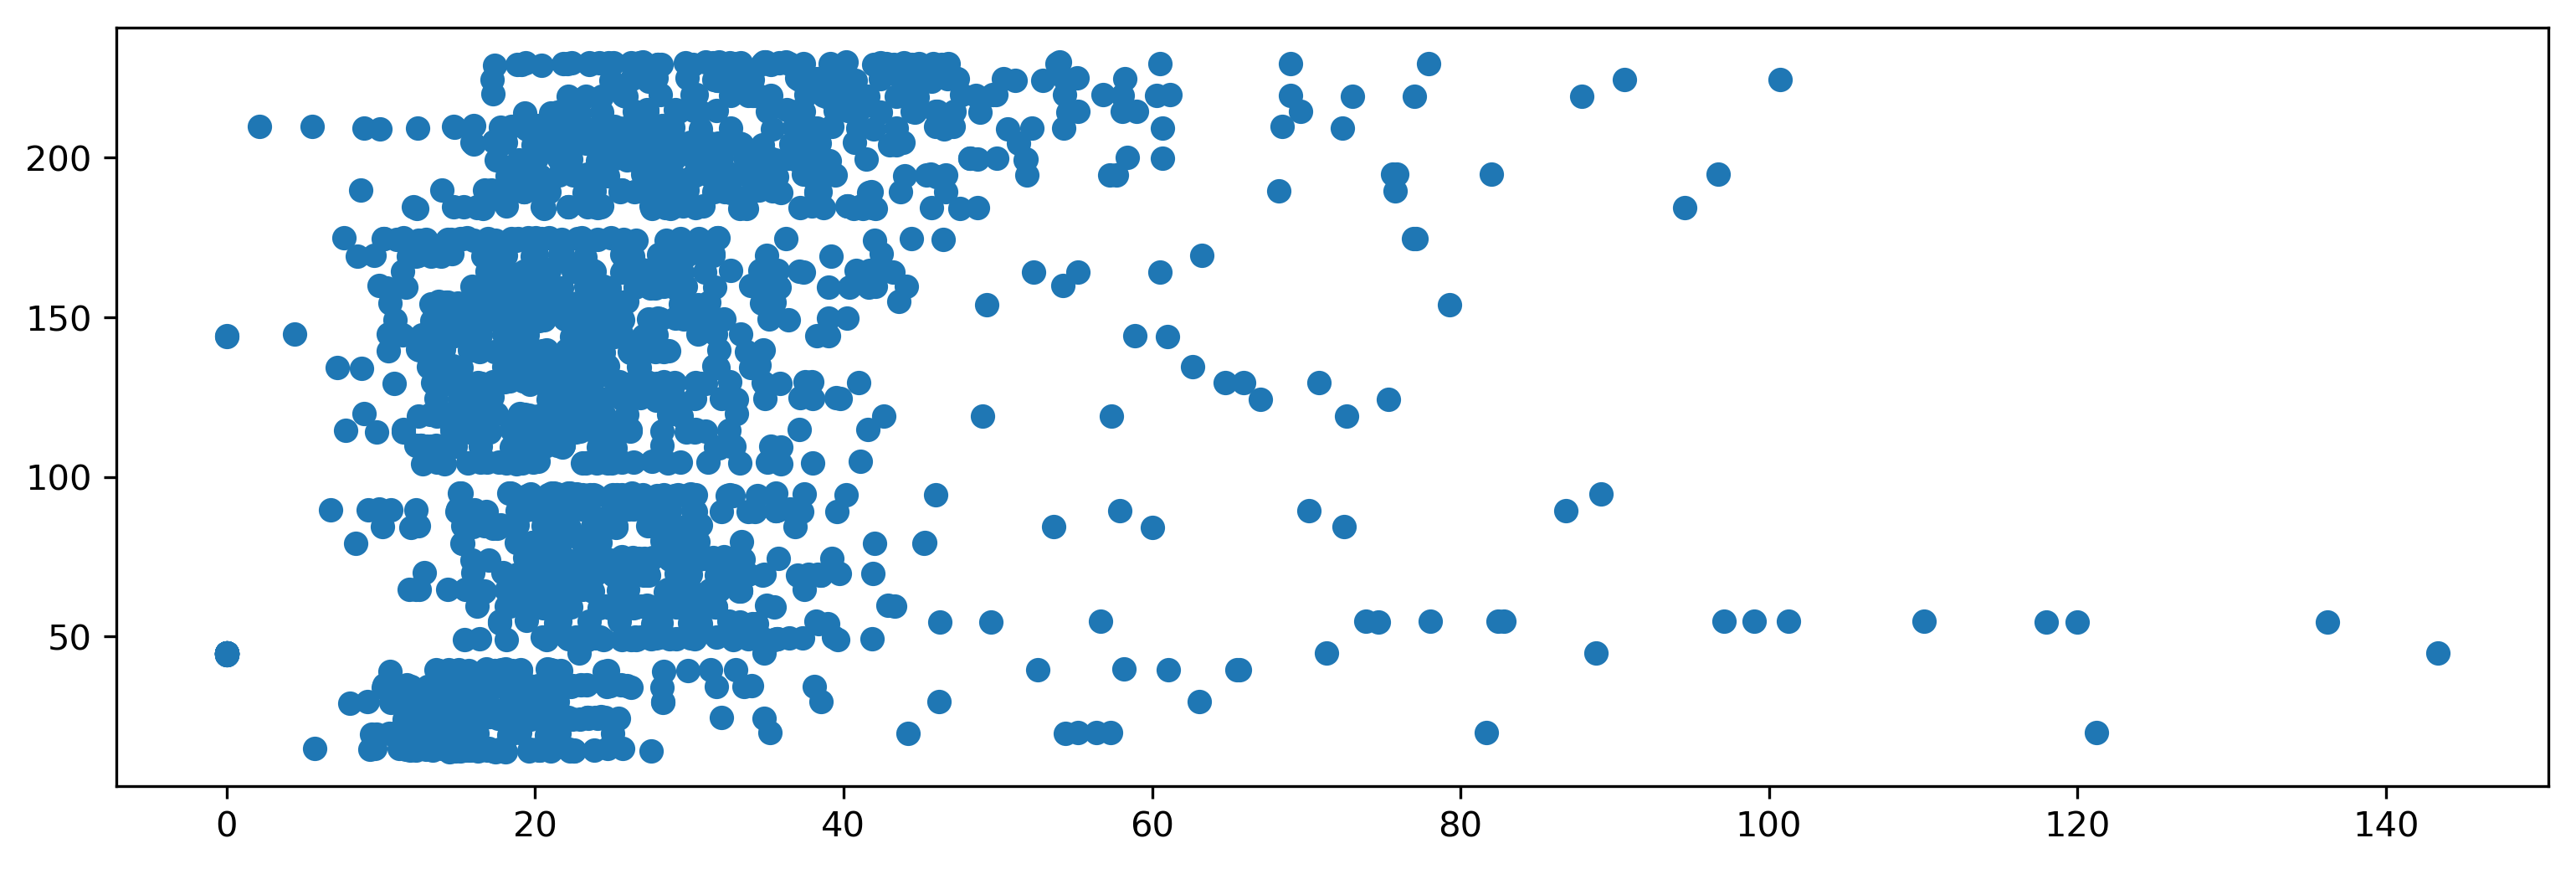

In [183]:
plt.scatter(df0['disp_div_v1_rms'],df0['life'])

In [133]:
df_noz.isnull().any(1)

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
        ... 
6625    True
6626    True
6627    True
6628    True
6629    True
6630    True
6631    True
6632    True
6633    True
6634    True
6635    True
6641    True
6642    True
6643    True
6644    True
6645    True
6646    True
6647    True
6648    True
6649    True
6650    True
6651    True
6652    True
6653    True
6654    True
6655    True
6656    True
6657    True
6658    True
6659    True
dtype: bool

In [175]:
x_features_1s=['m','csv','cu_75','cu_std','cu_max','cu_mean',
               'spindle_load_mean',
               'v1_std','v1_min','v1_rms','v1_75','v1_Ce',
               'v2_std','v2_min','v2_rms','v2_75','v2_Ce',
               'v3_std','v3_min','v3_rms','v3_75', 'v3_Ce',
               'life'   
]

In [176]:
df_noz[x_features_1s].count()

m                    5282
csv                  5282
cu_75                5266
cu_std               5266
cu_max               5266
cu_mean              5266
spindle_load_mean    5282
v1_std               5266
v1_min               5266
v1_rms               5266
v1_75                5266
v1_Ce                5266
v2_std               5266
v2_min               5266
v2_rms               5266
v2_75                5266
v2_Ce                5266
v3_std               5266
v3_min               5266
v3_rms               5266
v3_75                5266
v3_Ce                5266
life                 5282
dtype: int64

In [177]:
df_noz[df_noz[x_features_1s].isnull().any(1)==False][x_features_1s].to_csv('H:\\12_Kaggle\\toollife\\pythonProject\\PreProcessed\\1s_featureset1.csv')

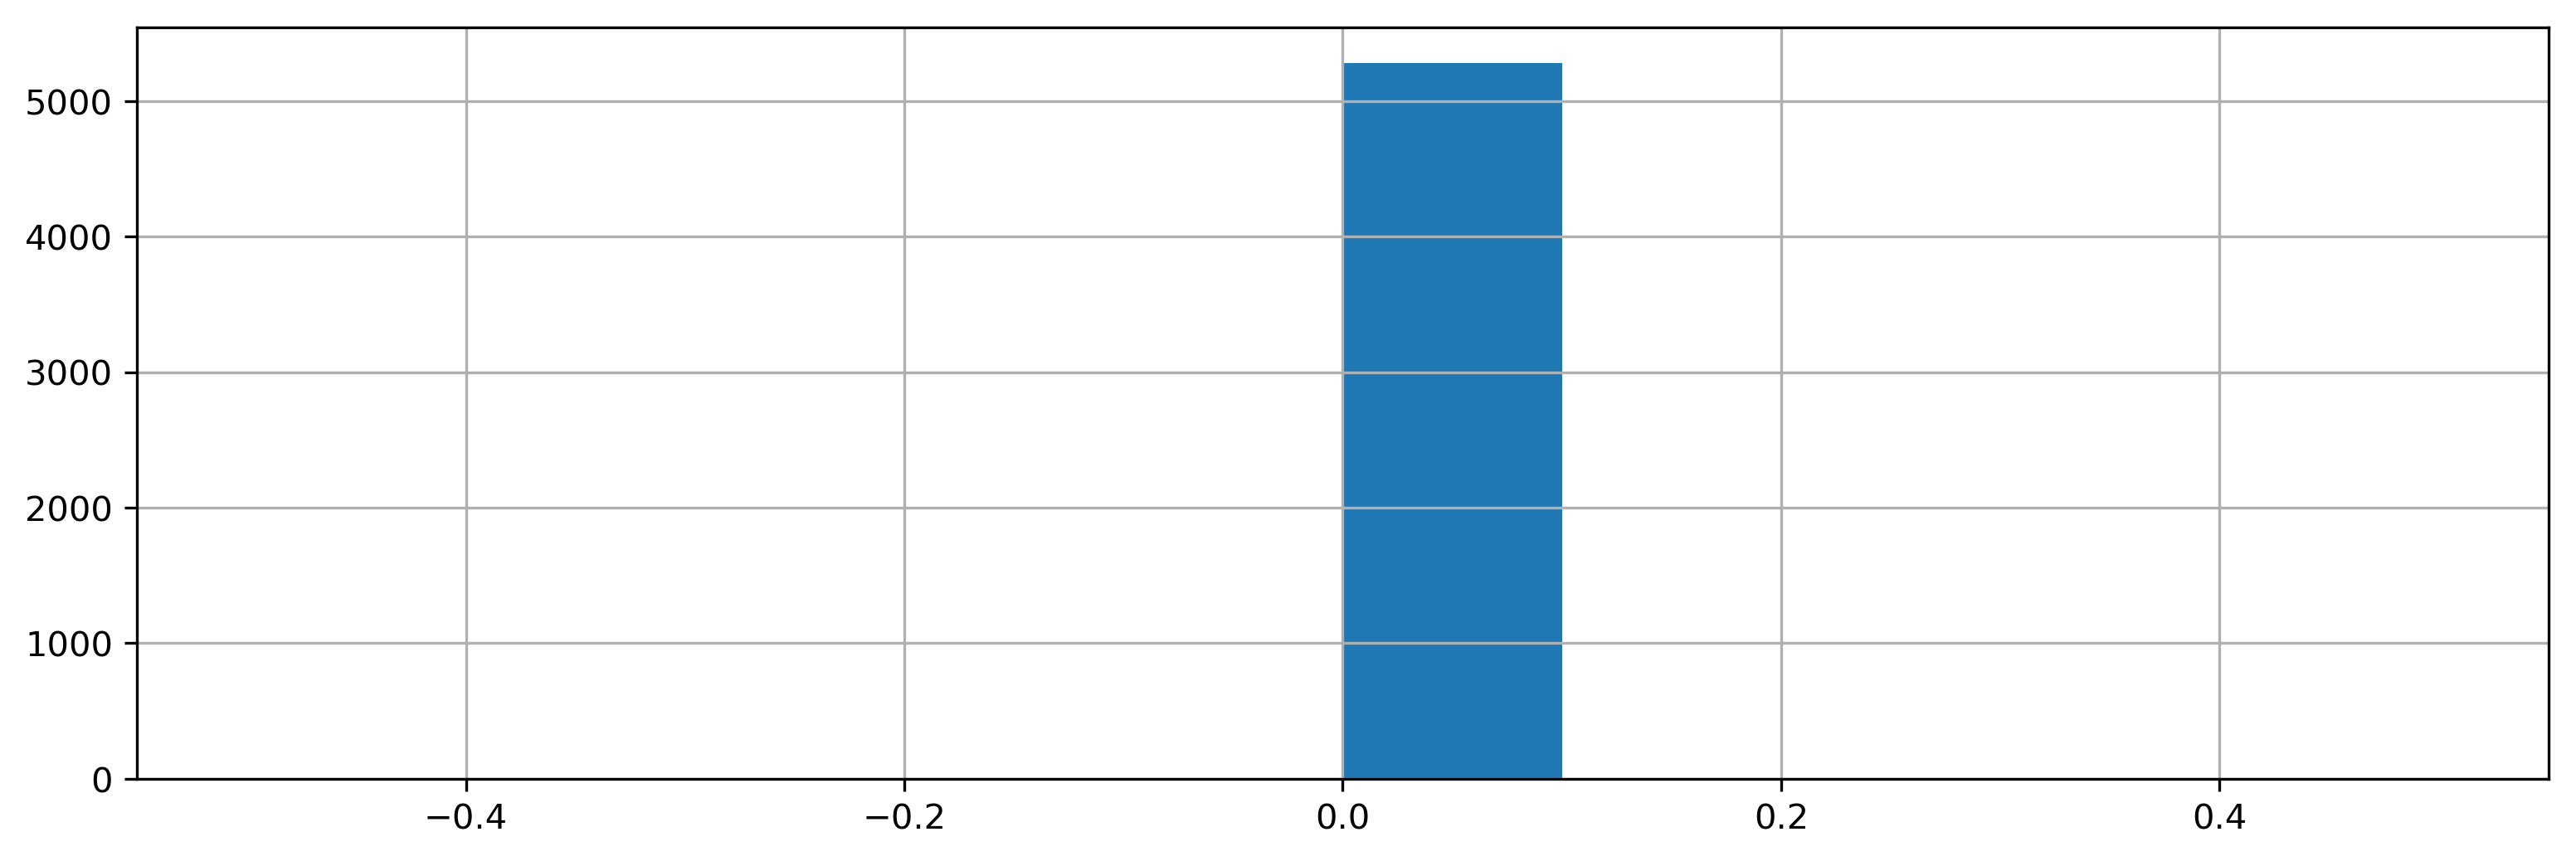

In [152]:
df_noz['z_move_count'].hist()

In [ ]:
df_noz.to_csv

In [147]:
df_noz['x_disp_mean'].isnull().value_counts()

False    5166
True      116
Name: x_disp_mean, dtype: int64

In [141]:
df_noz.isnull().any()

Unnamed: 0           False
m                    False
csv                  False
sec                  False
duration             False
c                    False
spindle_load_mean    False
sl_std               False
sl_min               False
sl_25                False
sl_50                False
sl_75                False
sl_max               False
x_disp_max           False
x_disp_mean           True
x_disp_sum           False
y_disp_max           False
y_disp_mean           True
y_disp_sum           False
z_disp_max           False
z_disp_mean           True
z_disp_sum           False
x_move_count         False
y_move_count         False
z_move_count         False
all_displacement     False
c1                   False
v1_mean               True
v1_std                True
v1_min                True
                     ...  
c4                   False
cu_mean               True
cu_std                True
cu_min                True
cu_25                 True
cu_50                 True
c

In [136]:
#是否有空值
df_noz.isnull().value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [118]:
(df_noz.isnull().any(1)==False).value_counts()

False    5282
dtype: int64

In [119]:
#去掉空值
df_no_out=df_noz[df_noz.isnull().any(1)==False]

In [120]:
df_no_out.to_csv('H:\\12_Kaggle\\toollife\\pythonProject\\PreProcessed\\1s_no_outliers.csv')

In [107]:
df_no_out.count()

Unnamed: 0           3867
m                    3867
csv                  3867
sec                  3867
duration             3867
c                    3867
spindle_load_mean    3867
sl_std               3867
sl_min               3867
sl_25                3867
sl_50                3867
sl_75                3867
sl_max               3867
x_disp_max           3867
x_disp_max.1         3867
x_disp_max.2         3867
y_disp_max           3867
y_disp_max.1         3867
y_disp_max.2         3867
z_disp_max           3867
z_disp_max.1         3867
z_disp_max.2         3867
x_move_count         3867
y_move_count         3867
z_move_count         3867
all_displacement     3867
c1                   3867
v1_mean              3867
v1_std               3867
v1_min               3867
                     ... 
c4                   3867
cu_mean              3867
cu_std               3867
cu_min               3867
cu_25                3867
cu_50                3867
cu_75                3867
cu_max      

In [83]:
df0.corr()['life']
df0.corr().abs().sort('life')['life']

C:\Users\Zhitao\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


c                    0.002368
v3_mean              0.003823
sec                  0.003879
duration             0.005500
y_disp_max.2         0.009858
y_disp_max.1         0.009858
y_disp_max           0.009858
v3_min               0.010272
v3_Ce                0.014719
v3_Cf                0.016099
v1_Ip                0.020715
v2_Cq                0.029437
v1_50                0.032380
v1_Cq                0.034177
cu_25                0.040666
v3_Cq                0.043553
v3_max               0.043898
v1_mean              0.049930
v3_75                0.052937
v3_Cw                0.055619
v3_Xp                0.059349
cu_std               0.062541
c2                   0.092860
c4                   0.092860
c3                   0.092860
c1                   0.092860
v2_Ip                0.093877
v3_50                0.096200
x_disp_max.1         0.096706
x_disp_max.2         0.096706
                       ...   
cu_75                0.249985
v1_Xp                0.254270
sl_75     

In [11]:
x=df_noz.corr()['life']

In [16]:
test = df_noz.corr().sort(['life'], ascending=[False])

C:\Users\Zhitao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


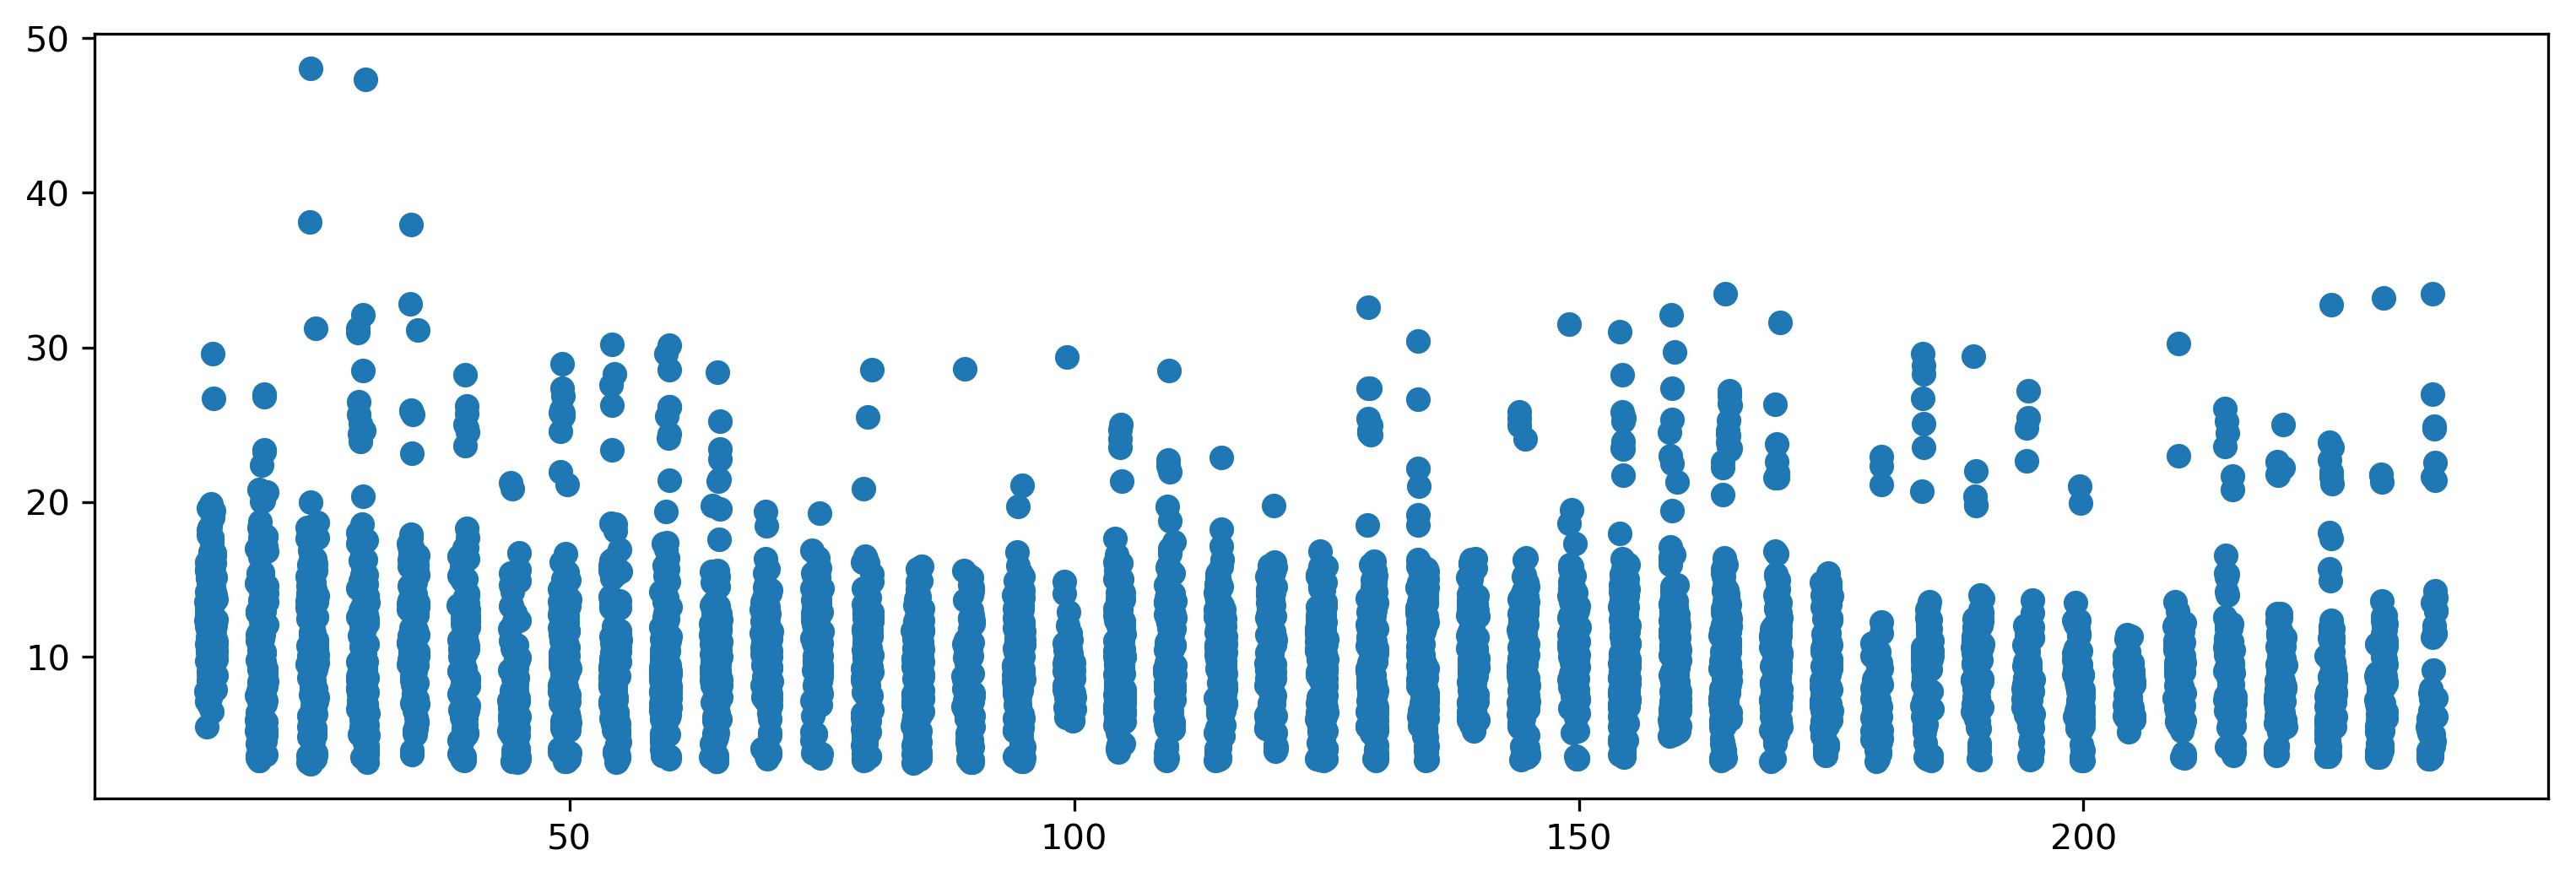

In [33]:
plt.scatter(df_noz['life'],df_noz['v2_Xp'])

In [41]:
df30=df_noz[df_noz['csv']==30]
df40=df_noz[df_noz['csv']==40]
df20=df_noz[df_noz['csv']==20]

In [38]:
df47

,Unnamed: 0,m,csv,sec,duration,c,spindle_load_mean,sl_std,sl_min,sl_25,...,v2_Cw,v2_Cq,v3_rms,v3_Xp,v3_Ip,v3_Cf,v3_Ce,v3_Cw,v3_Cq,life
1500,1500,0,30,0,-1.000,39.0,18.540621,3.645392,11.609241,19.064913,...,-1.460800e-06,0.000185,6.264788,10.867118,5.555689,-3686.116102,-671.662853,-2.399906e-06,0.000143,95.000000
1501,1501,0,30,1,-1.000,38.0,16.978330,5.089239,10.785241,10.785241,...,3.314764e-06,0.000163,5.951752,9.552688,4.941833,-1262.821831,-301.940789,-3.018226e-06,0.000135,94.983333
1502,1502,0,30,2,-1.000,37.0,17.123193,3.438985,11.987671,13.437300,...,2.430018e-06,0.000287,5.975458,12.755758,4.472147,526.537118,105.742620,4.695777e-06,0.000173,94.966667
1503,1503,0,30,3,-1.000,38.0,16.614678,4.567677,11.358989,11.507767,...,-2.277051e-06,0.000191,6.657893,12.862451,4.762897,75.892705,15.176174,3.444990e-06,0.000156,94.950000
1504,1504,0,30,4,-1.000,39.0,16.462623,3.456891,11.954100,13.830988,...,2.618649e-06,0.000197,6.300258,12.195121,4.397853,-82.561666,-17.686010,9.857907e-07,0.000148,94.933333
1505,1505,0,30,5,-1.000,40.0,18.708609,2.297535,12.198248,15.793329,...,3.274140e-06,0.000225,5.196350,9.328343,5.873656,2967.555392,542.041163,-1.662230e-06,0.000143,94.916667
1506,1506,0,30,6,-1.000,38.0,15.234438,3.750873,12.149419,12.149419,...,-6.559445e-06,0.000189,9.115487,13.634117,3.249789,73.746529,17.436545,-4.113560e-06,0.000153,94.900000
1507,1507,0,30,7,-1.000,39.0,15.083265,5.668473,9.689627,9.689627,...,-4.222875e-07,0.000223,6.006382,11.127818,4.092518,-216.001650,-49.416490,2.764787e-06,0.000154,94.883333
1508,1508,0,30,8,-1.000,40.0,20.506226,1.583203,18.155461,20.535905,...,-6.235615e-06,0.000162,8.197193,11.444833,3.359813,88.613509,20.959689,-2.129404e-06,0.000136,94.866667
1509,1509,0,30,9,-1.000,43.0,15.659331,6.765114,9.799493,9.799493,...,-1.598686e-06,0.000230,4.782065,10.184359,5.858564,-180.091960,-32.202134,1.628203e-06,0.000146,94.850000


In [54]:
df[df['m']==0].count()[0],df[df['m']==1].count()[0],df[df['m']==2].count()[0]

(2374, 1353, 1555)

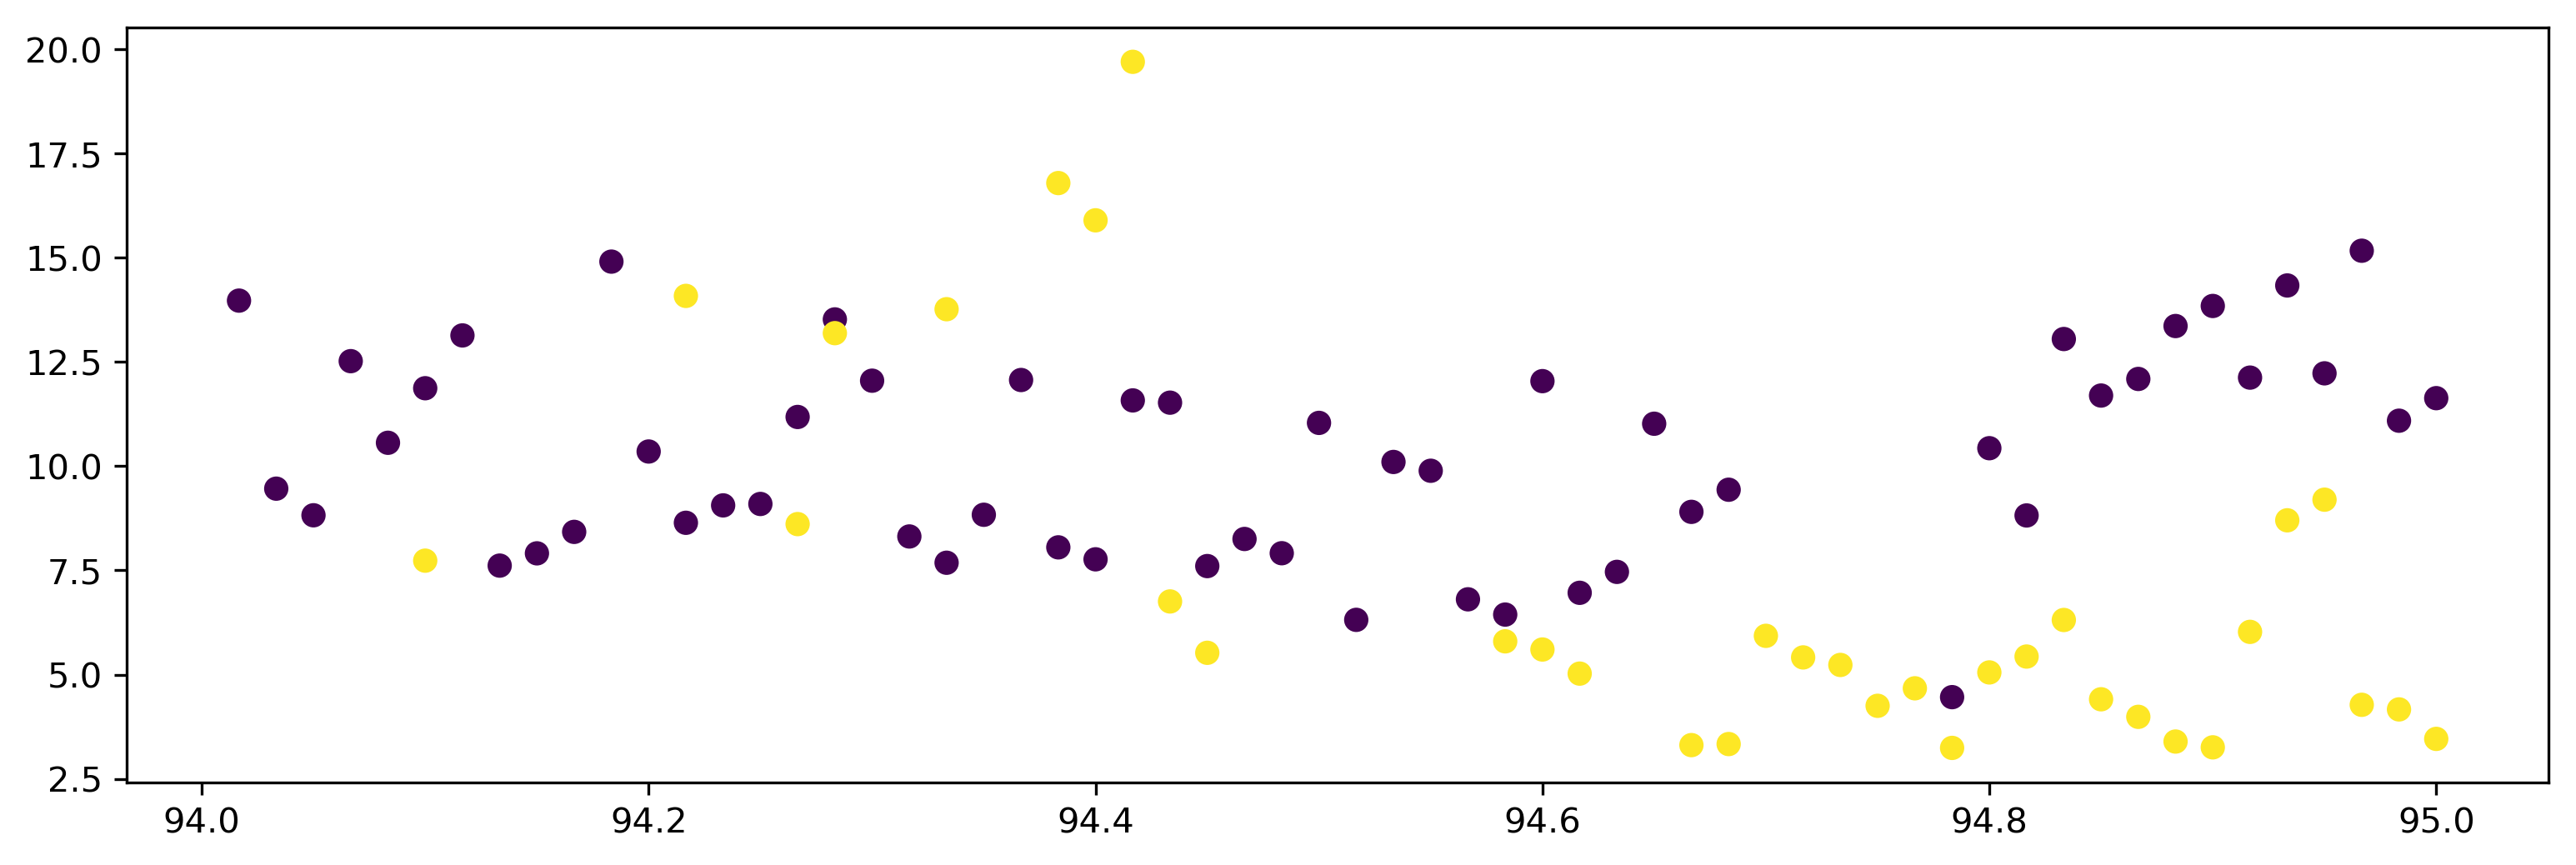

In [45]:
plt.scatter(df30['life'],df30['v2_Xp'],c=df30['m'])

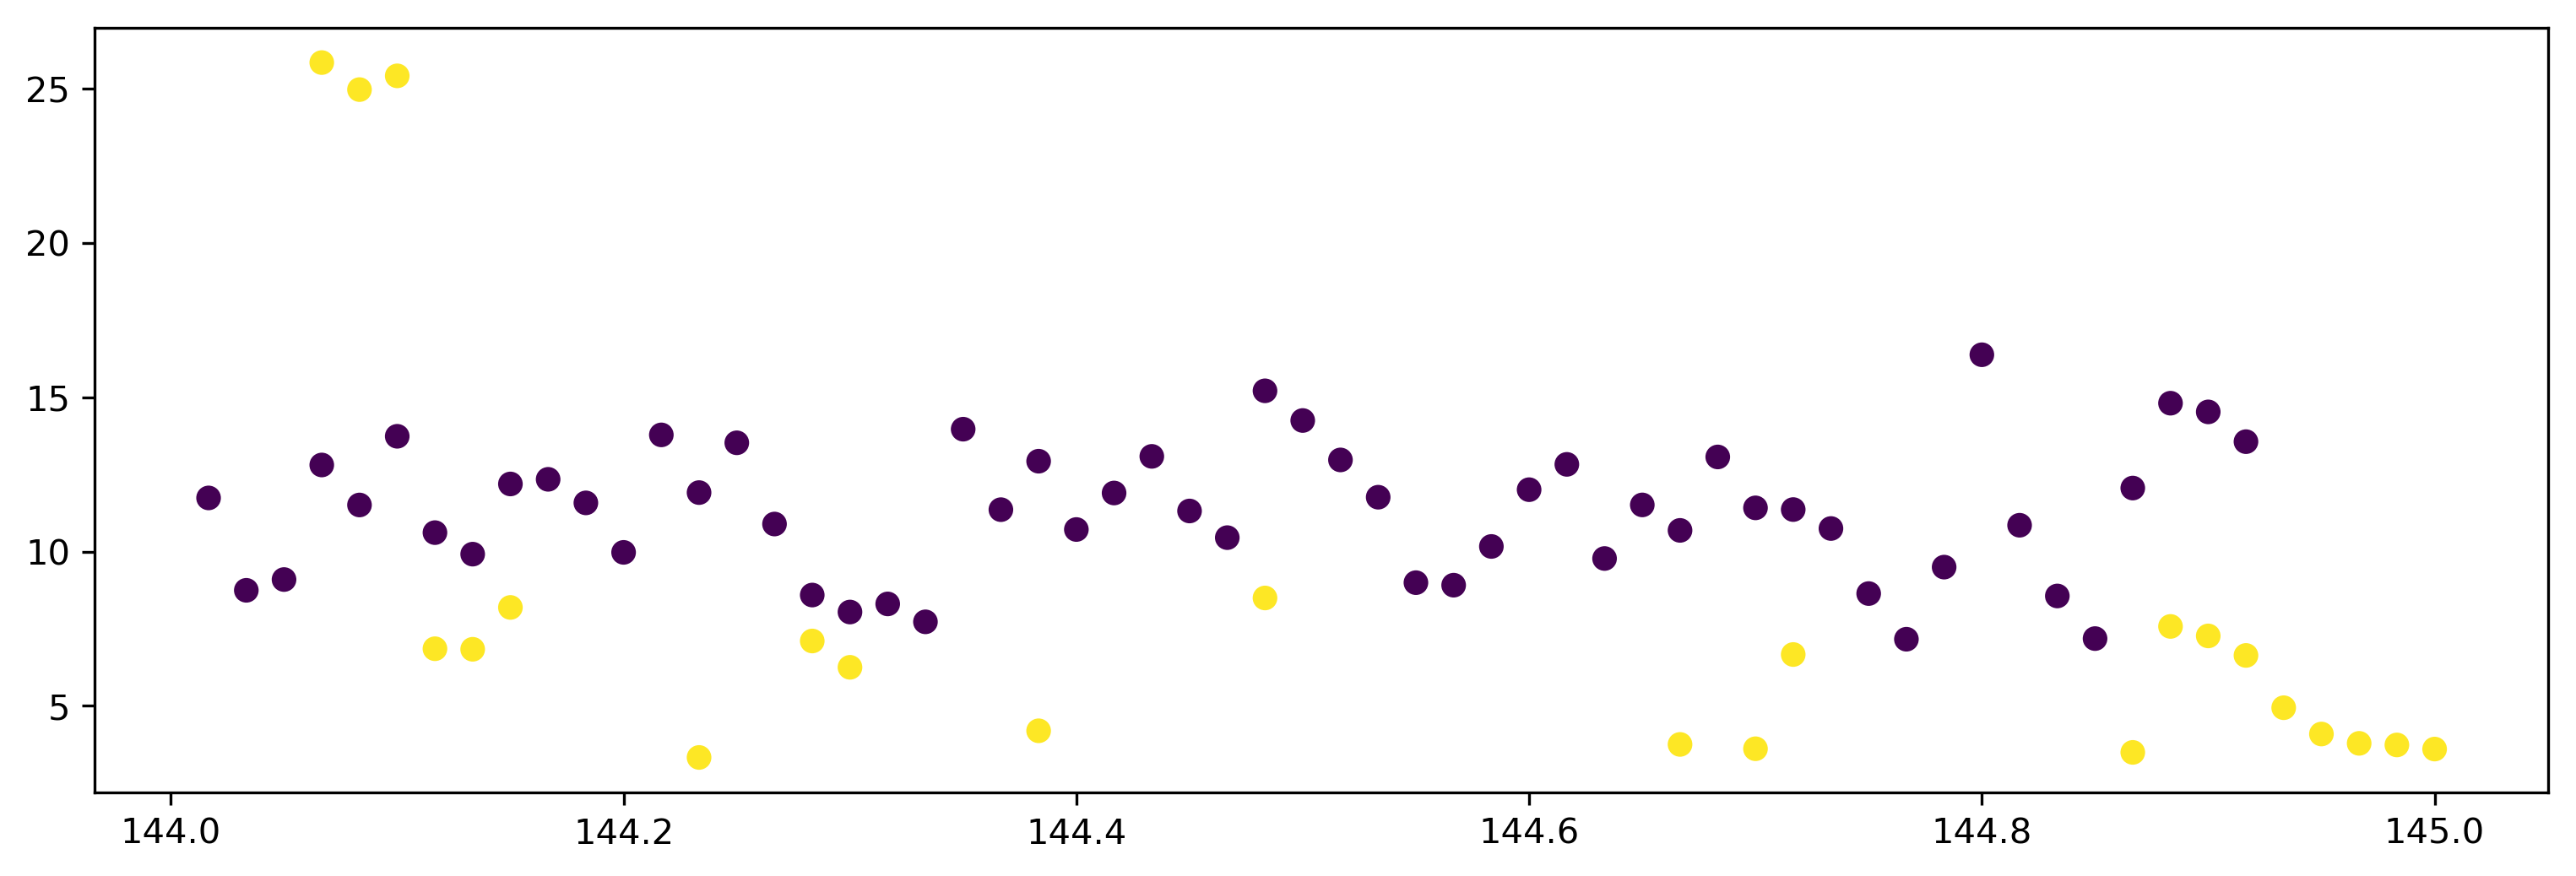

In [46]:
plt.scatter(df20['life'],df20['v2_Xp'],c=df20['m'])

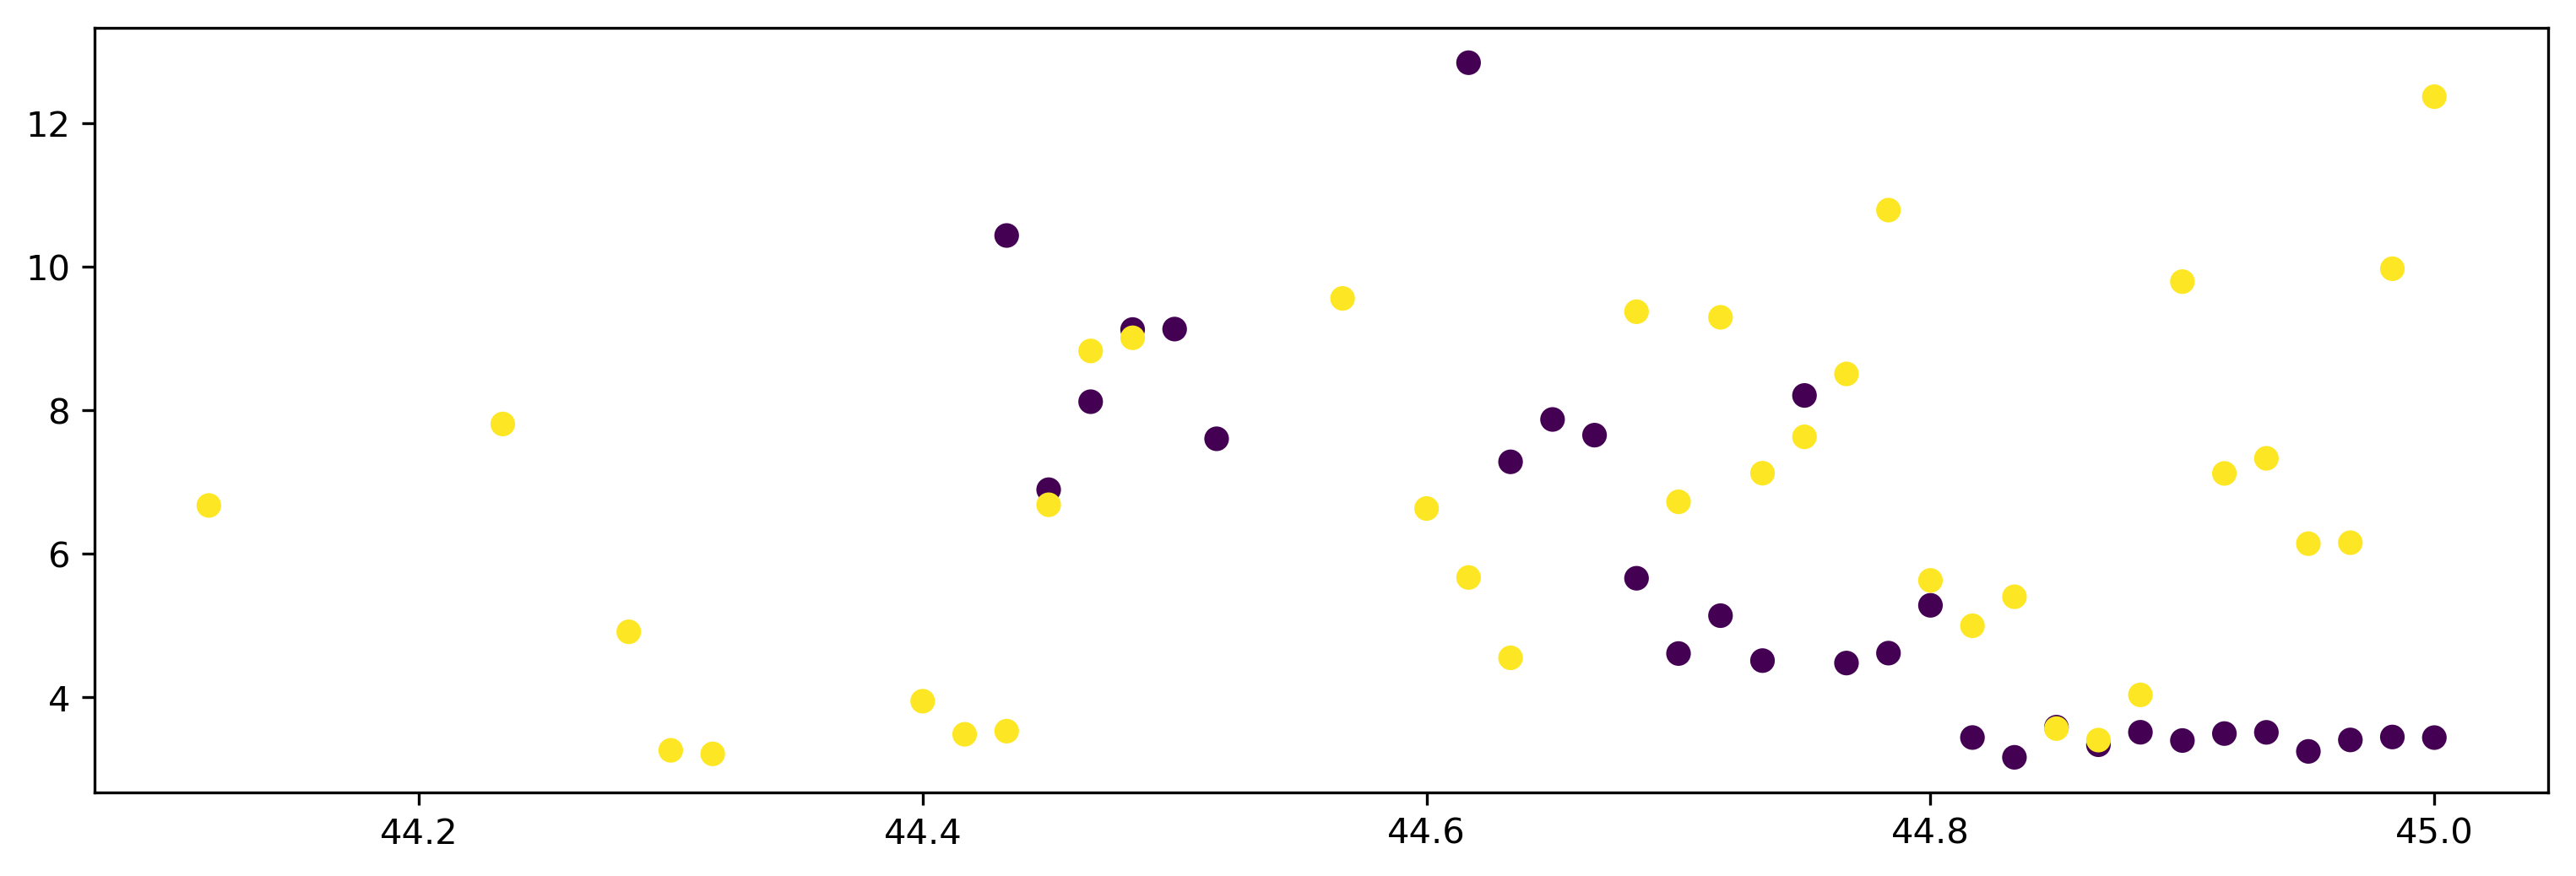

In [47]:
plt.scatter(df40['life'],df40['v2_Xp'],c=df40['m'])

In [24]:
test['life']

life                 1.000000
cu_75                0.334793
v2_25                0.267669
cu_std               0.241341
v1_25                0.204171
cu_max               0.168406
cu_mean              0.147699
v3_min               0.132961
v1_min               0.131195
v2_min               0.128517
v3_25                0.125277
cu_50                0.091637
v2_Ip                0.072103
x_disp_max           0.068314
x_disp_max.1         0.068314
x_disp_max.2         0.068314
v3_Ip                0.066835
v1_Cw                0.066170
c1                   0.064458
c2                   0.064458
c4                   0.064458
c3                   0.064458
y_move_count         0.058864
v1_Cq                0.058218
v2_Cq                0.047018
x_move_count         0.040347
v3_Cq                0.037213
all_displacement     0.030157
v3_50                0.023819
sec                  0.022492
                       ...   
v2_mean             -0.088789
sl_std              -0.099686
v3_std    

In [14]:
a=list(x)

In [23]:
test.index

Index(['life', 'cu_75', 'v2_25', 'cu_std', 'v1_25', 'cu_max', 'cu_mean',
       'v3_min', 'v1_min', 'v2_min', 'v3_25', 'cu_50', 'v2_Ip', 'x_disp_max',
       'x_disp_max.1', 'x_disp_max.2', 'v3_Ip', 'v1_Cw', 'c1', 'c2', 'c4',
       'c3', 'y_move_count', 'v1_Cq', 'v2_Cq', 'x_move_count', 'v3_Cq',
       'all_displacement', 'v3_50', 'sec', 'v1_Ip', 'v2_Cw', 'c', 'v3_Cf',
       'v3_Cw', 'v3_Ce', 'duration', 'v2_Cf', 'v3_mean', 'v2_Ce',
       'y_disp_max.1', 'y_disp_max', 'y_disp_max.2', 'v1_50', 'v3_rms',
       'v1_Cf', 'v3_max', 'v3_Xp', 'v1_Ce', 'v1_mean', 'v2_mean', 'sl_std',
       'v3_std', 'sl_min', 'v2_rms', 'v2_Xp', 'v1_Xp', 'v3_75', 'sl_25',
       'v2_max', 'v1_max', 'v1_50.1', 'sl_50', 'm', 'v1_rms', 'v1_std',
       'cu_min', 'v2_std', 'spindle_load_mean', 'sl_75', 'sl_max', 'v1_75',
       'cu_25', 'v2_75', 'Unnamed: 0', 'csv', 'z_disp_max', 'z_disp_max.1',
       'z_disp_max.2', 'z_move_count'],
      dtype='object')

In [31]:
df_noz.count()[0]

5282

<bound method Figure.tight_layout of <Figure size 3750x1200 with 9 Axes>>

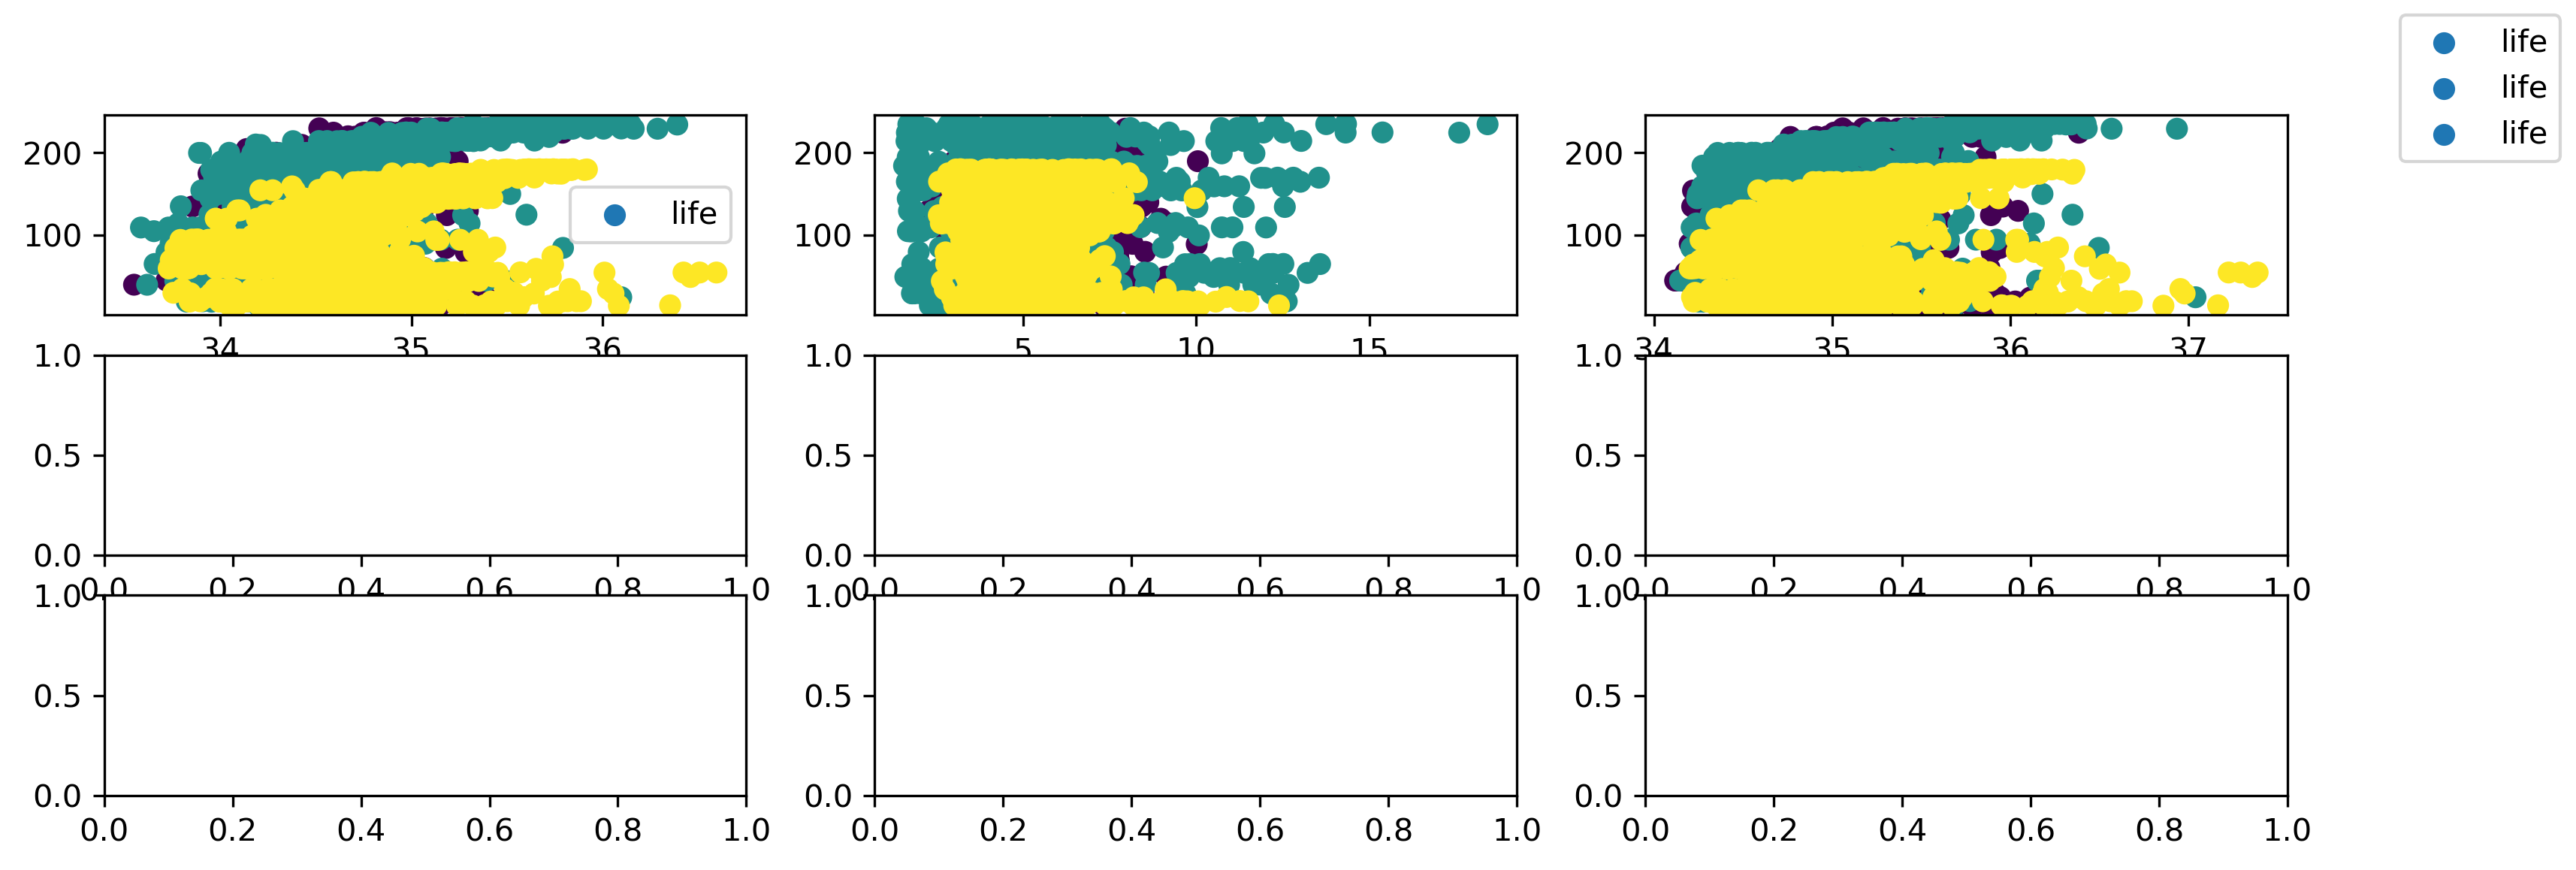

In [29]:
#探索离群值 1s

df=df_noz
m=df['m']

fig,ax=plt.subplots(3,3)

ax=ax.flatten()
ax[0].scatter(df['cu_75'],df['life'],c=m)
ax[1].scatter(df['v2_Ip'],df['life'],c=m)
ax[2].scatter(df['cu_std'],df['life'],c=m)
ax[0].legend()

# ax[3].scatter(df['current_mean'],df['Life'],c=m)
# ax[4].scatter(df['current_std'],df['Life'],c=m)
# # ax[5].scatter(df['vibration_2_mean'],df['Life'],c=m)

# ax[6].scatter(df['sl_mean'],df['Life'],c=m)
# ax[7].scatter(df['sl_std'],df['Life'],c=m)
# ax[8].scatter(df['s'],df['Life'],c=m)
fig.legend()
fig.tight_layout

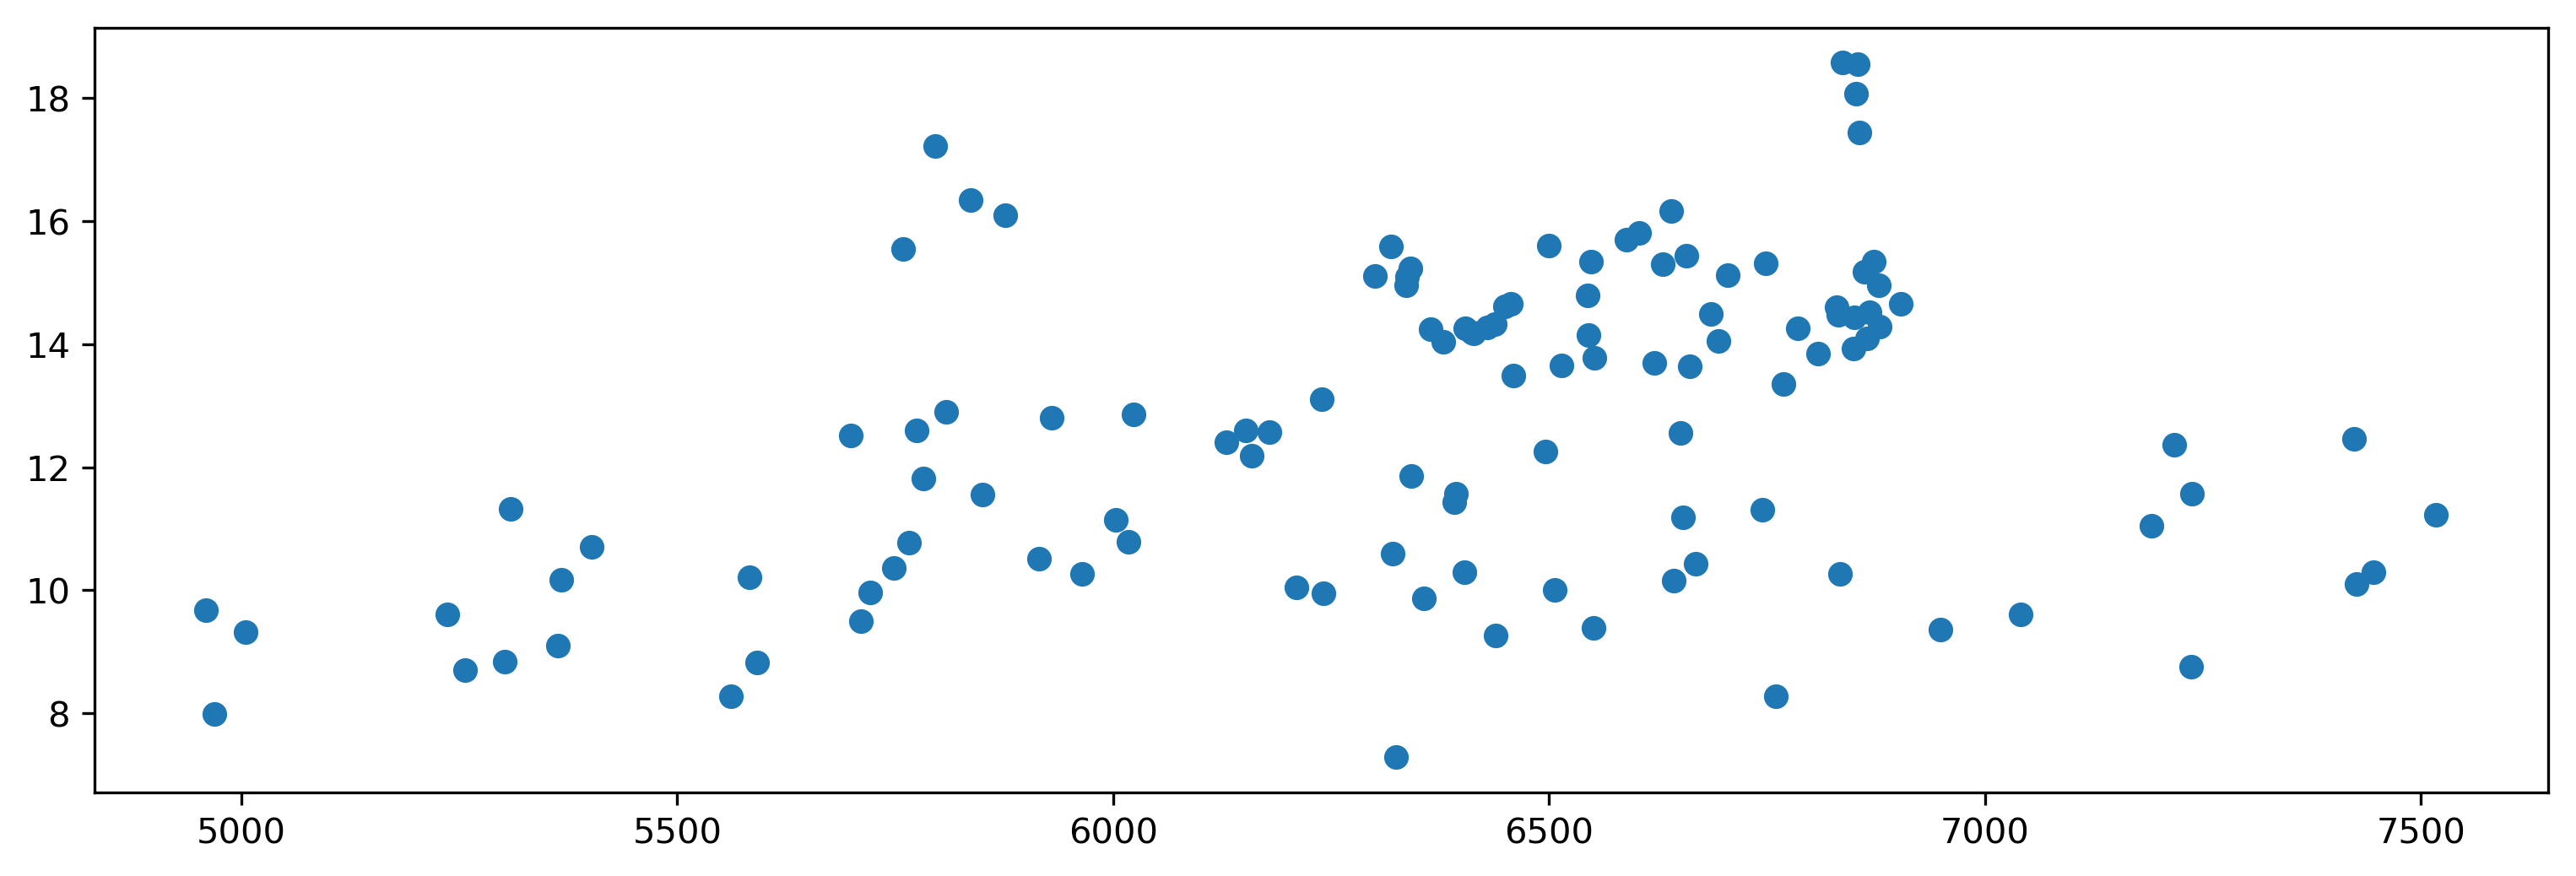

In [104]:
plt.scatter(df['displacement_all'],df['sl_mean'])

# 添加一些计算的feature


# 添加一些variance类型的feature （todo)

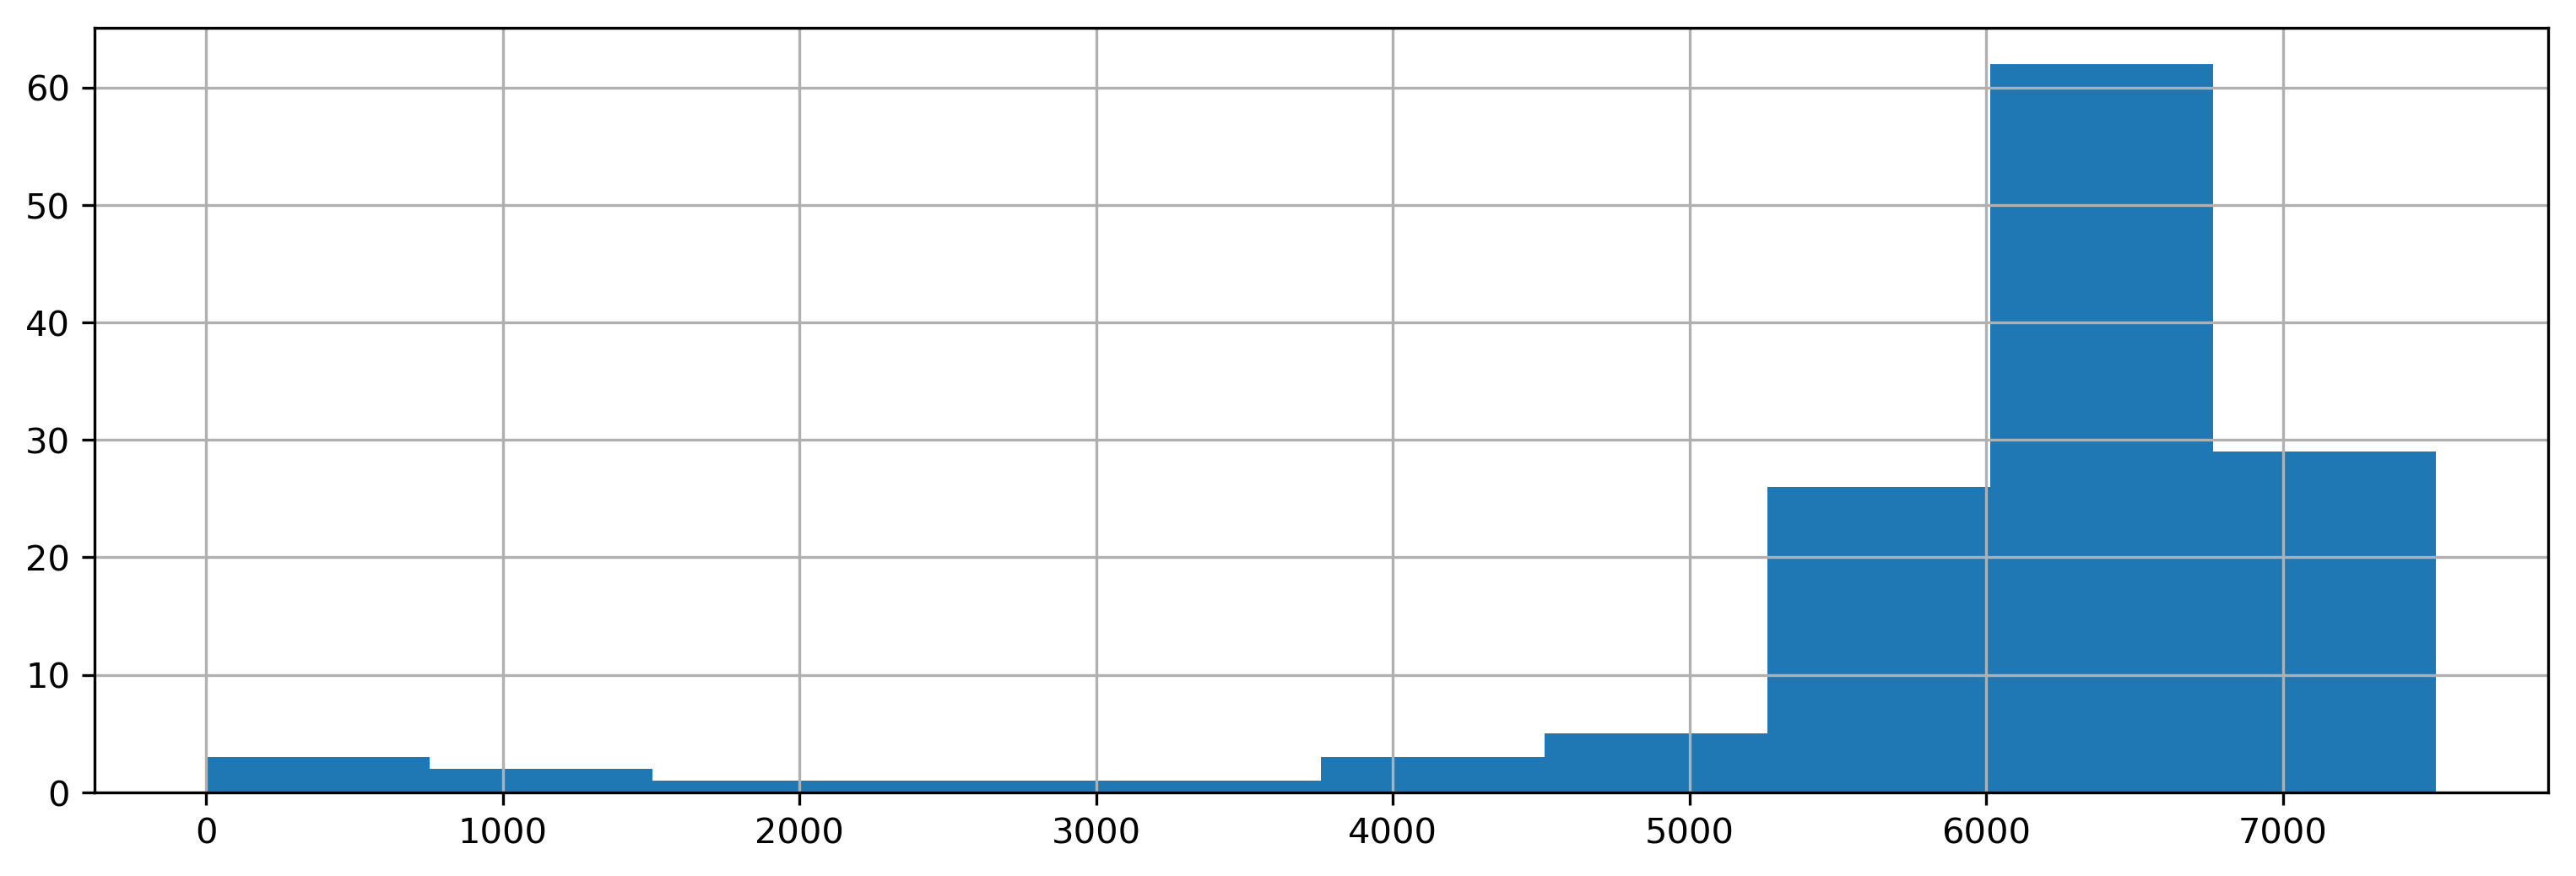

In [92]:
df.displacement_all.hist()

In [93]:
#找到和life或者lifeP corr系数最大的
df1=df[df['Machine']==0]
df2=df[df['Machine']==1]
df3=df[df['Machine']==2]

most_corr_feature1=abs(df1.corr()['Life'])
most_corr_feature2=abs(df2.corr()['Life'])
most_corr_feature3=abs(df3.corr()['Life'])
most_corr_feature=abs(df.corr()['Life'])

corr_feature1=df1.corr()['Life']
corr_feature2=df2.corr()['Life']
corr_feature3=df3.corr()['Life']
corr_feature=df.corr()['Life']

# most_corr_feature.sort_values(ascending=False)
# most_corr_feature
all_corr=pd.concat([corr_feature,corr_feature1,corr_feature2,corr_feature3])
all_corr.to_csv('H:\\12_Kaggle\\toollife\\pythonProject\\PreProcessed\\corr_plusFeaturesV1.csv')

#全部测试数据中，最大的影响feature是 sl_std, sl_max，#然后是current25，currentstd


In [8]:
f1=df[['Life',
       'sl_mean','sl_std','sl_max',
       'x_disp_sum','y_disp_sum','z_disp_sum',
       'vibration_1_std','vibration_1_mean','vibration_2_mean', 'vibration_2_std', 'vibration_3_std', 'vibration_3_min',
      'current_mean', 'current_std']]

In [9]:
f1.describe()

,Life,sl_mean,sl_std,sl_max,x_disp_sum,y_disp_sum,z_disp_sum,vibration_1_std,vibration_1_mean,vibration_2_mean,vibration_2_std,vibration_3_std,vibration_3_min,current_mean,current_std
count,133.000000,133.000000,1.330000e+02,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,132.000000,1.330000e+02,133.000000,133.000000
mean,114.849624,11.906523,4.955605e+00,27.803188,3267.080857,3279.054005,171.661868,2.008509,0.032532,inf,inf,2.879875,-1.265251e+306,-0.529204,34.182670
std,66.642817,3.598620,1.333814e+00,4.997436,875.172238,1011.304134,232.276803,0.473325,0.002251,NaN,NaN,2.030350,inf,1.447088,4.395696
min,5.000000,0.006104,4.250000e-17,0.006104,0.000000,0.000000,0.000000,0.022109,0.027952,-0.014519,0.016938,0.028180,-1.682783e+308,-13.163052,0.072880
25%,60.000000,10.150383,4.118052e+00,25.693533,3050.025800,2501.096800,2.313000,1.812814,0.031019,-0.010458,1.706173,2.024822,-2.492035e+01,-0.377665,34.751437
50%,115.000000,12.459927,4.822019e+00,27.524644,3468.807500,3507.732100,20.000000,2.019832,0.032328,-0.009406,1.927454,2.256890,-1.822115e+01,-0.349445,34.952391
75%,170.000000,14.435815,5.788300e+00,29.834895,3760.383000,3975.591800,285.516600,2.325957,0.033873,-0.007986,2.224728,2.663753,-1.496928e+01,-0.331609,35.170373
max,240.000000,18.578114,9.186503e+00,44.074831,4571.905000,4968.911700,953.265900,2.829899,0.041799,inf,inf,11.585442,-4.176980e-01,-0.289949,36.355980


In [10]:
f1.corr()

,Life,sl_mean,sl_std,sl_max,x_disp_sum,y_disp_sum,z_disp_sum,vibration_1_std,vibration_1_mean,vibration_2_mean,vibration_2_std,vibration_3_std,vibration_3_min,current_mean,current_std
Life,1.000000,-0.193898,-0.516444,-0.364903,0.124345,-0.055883,-0.235273,-0.084927,-0.359820,-0.223011,-0.044896,-0.081014,NaN,-0.169012,0.258483
sl_mean,-0.193898,1.000000,0.094584,0.166811,0.534339,0.872012,-0.496507,0.683343,-0.390132,-0.224133,0.491034,0.267308,NaN,0.365678,0.403502
sl_std,-0.516444,0.094584,1.000000,0.633882,0.080105,0.057345,0.409627,0.085709,0.053613,-0.125393,0.133057,0.293264,NaN,0.179624,-0.089112
sl_max,-0.364903,0.166811,0.633882,1.000000,-0.047440,0.102214,0.325537,0.119782,-0.083374,-0.098667,0.065968,0.224372,NaN,-0.316707,0.033416
x_disp_sum,0.124345,0.534339,0.080105,-0.047440,1.000000,0.478878,-0.162538,0.427142,-0.354951,-0.350709,0.458961,0.012660,NaN,0.370225,0.463479
y_disp_sum,-0.055883,0.872012,0.057345,0.102214,0.478878,1.000000,-0.612213,0.581491,-0.342368,-0.169479,0.426333,0.352744,NaN,0.369021,0.353950
z_disp_sum,-0.235273,-0.496507,0.409627,0.325537,-0.162538,-0.612213,1.000000,-0.274015,0.242706,-0.096210,-0.080579,-0.132000,NaN,-0.260621,-0.119449
vibration_1_std,-0.084927,0.683343,0.085709,0.119782,0.427142,0.581491,-0.274015,1.000000,-0.510868,-0.417571,0.919032,0.418870,0.000000,0.236688,0.651414
vibration_1_mean,-0.359820,-0.390132,0.053613,-0.083374,-0.354951,-0.342368,0.242706,-0.510868,1.000000,0.711387,-0.430688,-0.195605,-0.000000,-0.053264,-0.537299
vibration_2_mean,-0.223011,-0.224133,-0.125393,-0.098667,-0.350709,-0.169479,-0.096210,-0.417571,0.711387,1.000000,-0.380215,-0.327260,0.392215,-0.018520,-0.577736


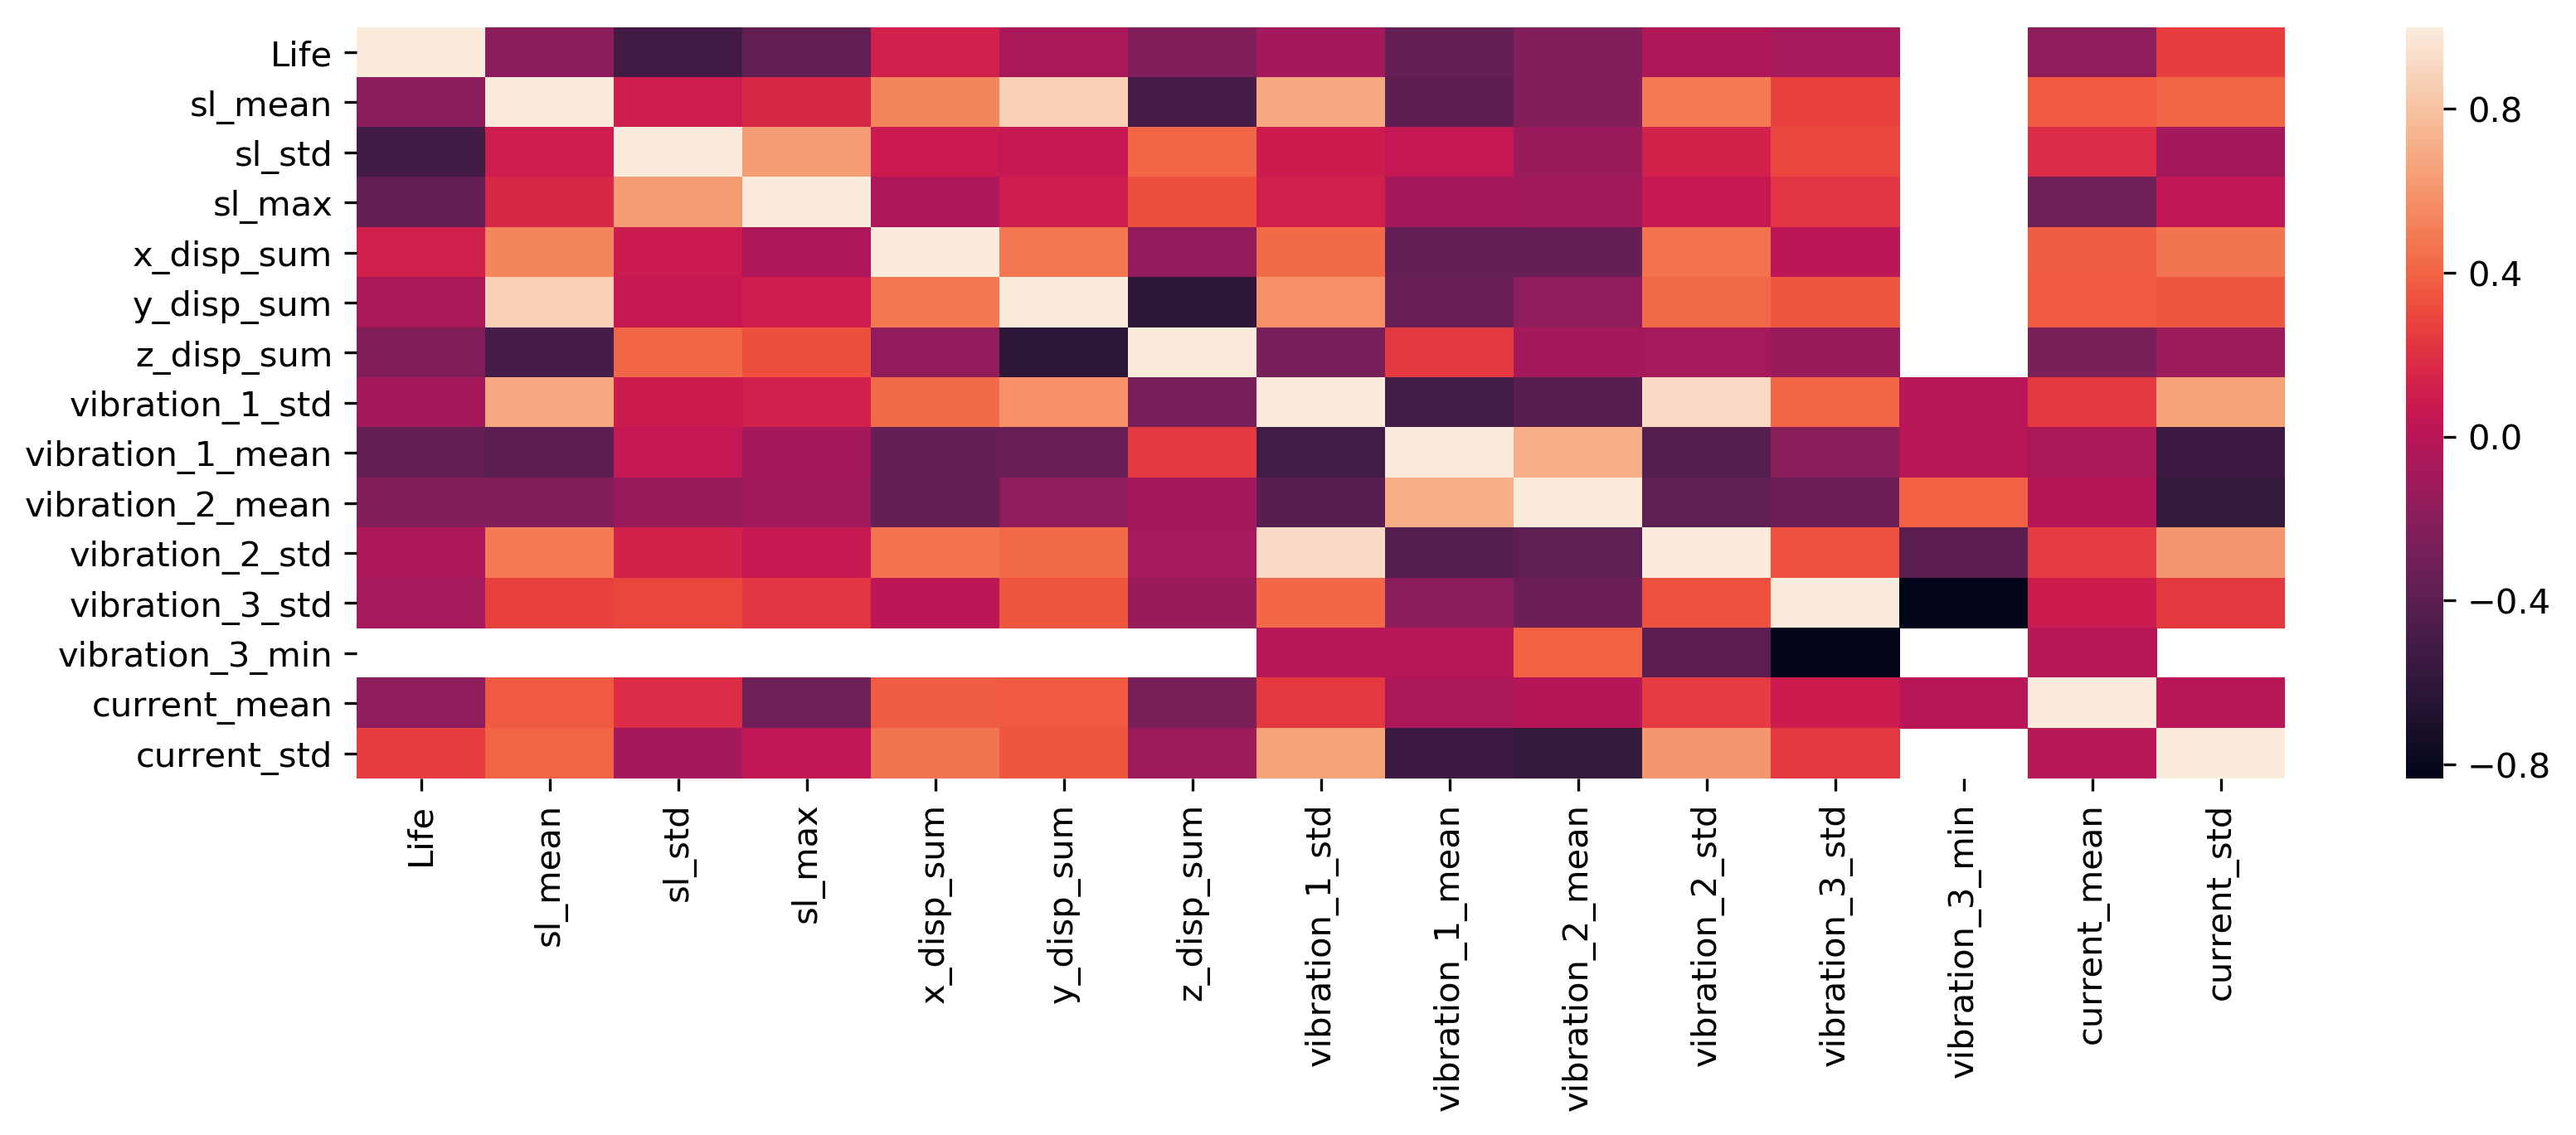

In [11]:
sns.heatmap(f1.corr())

In [71]:
set(m)

{0, 1, 2}

<bound method Figure.tight_layout of <Figure size 3750x1200 with 9 Axes>>

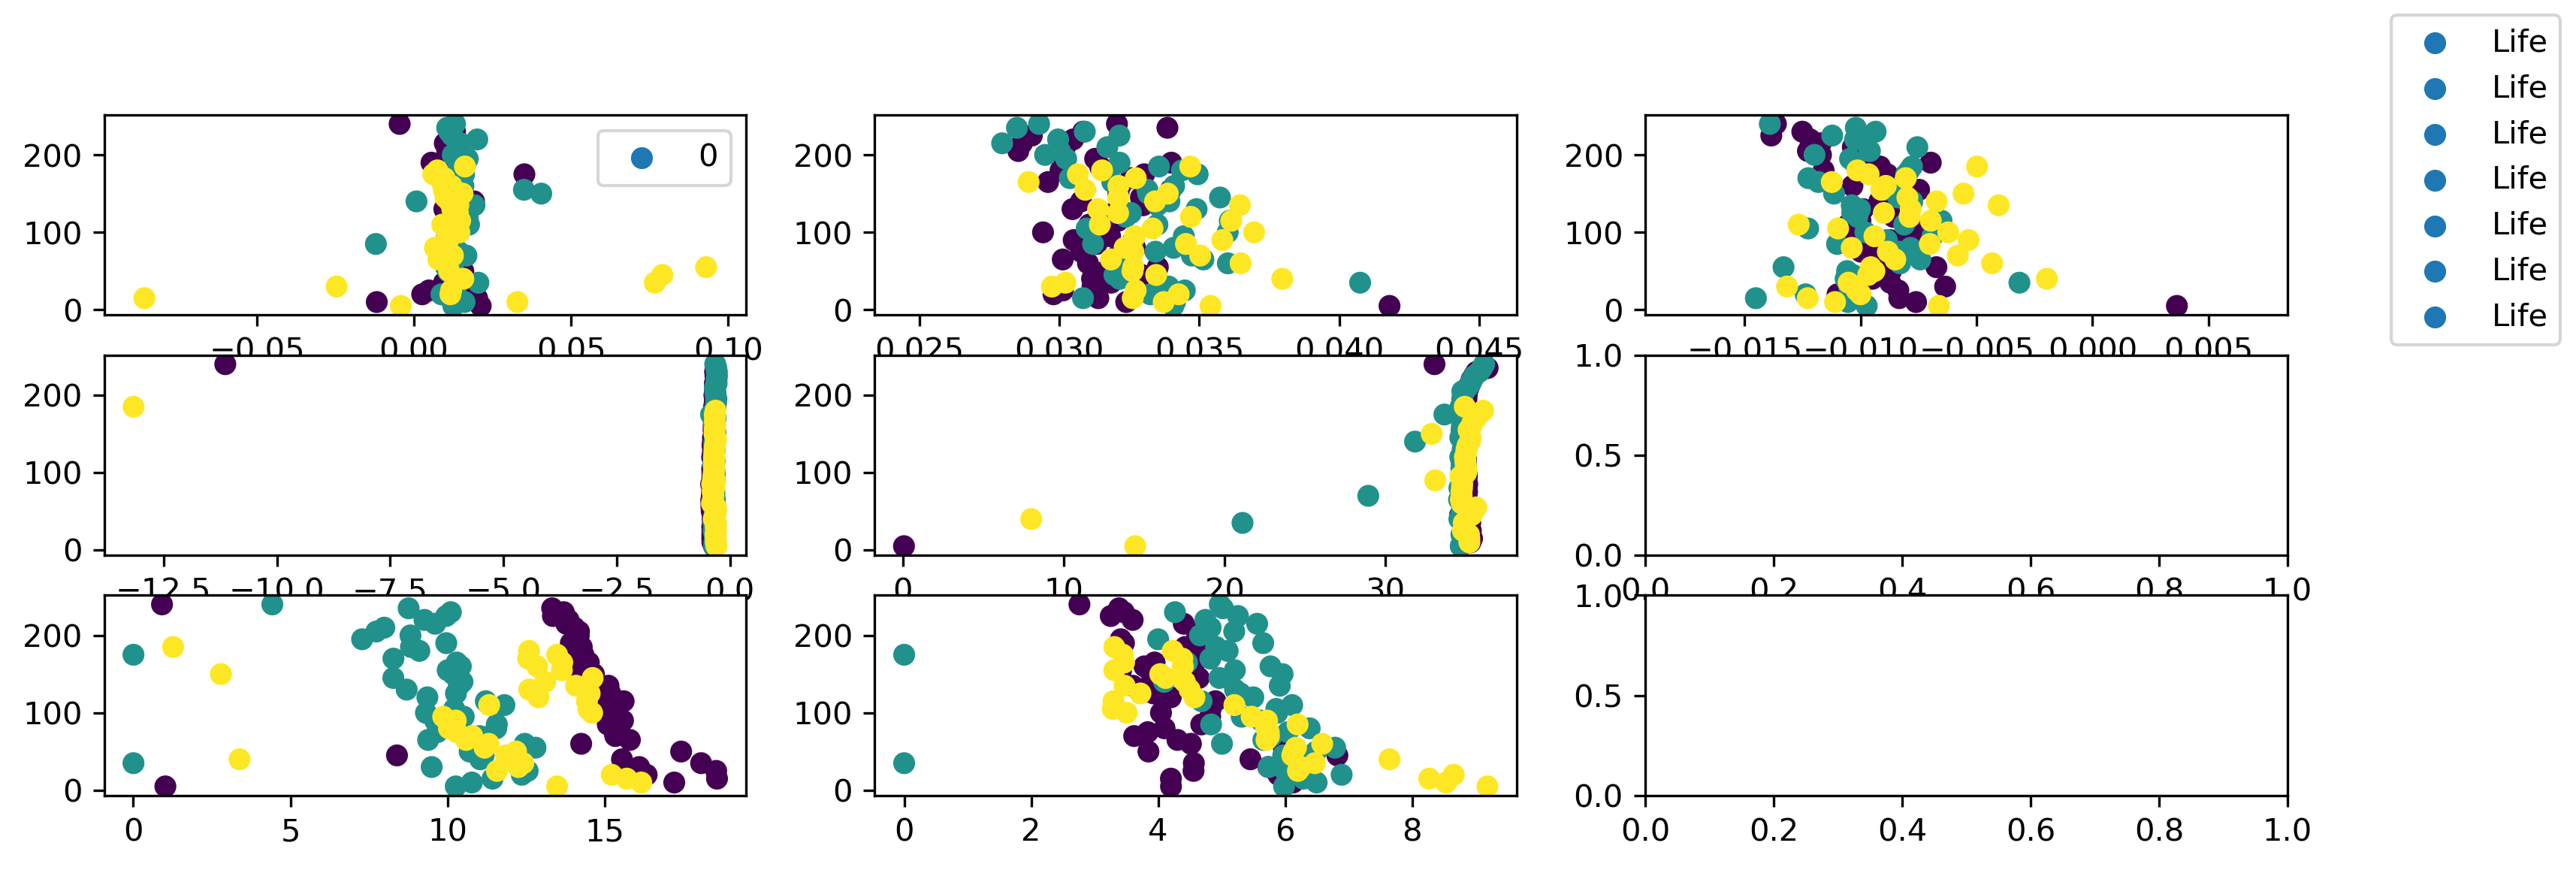

In [72]:
#探索离群值 vibration,
m=df['Machine']

fig,ax=plt.subplots(3,3)

ax=ax.flatten()
ax[0].scatter(df['vibration_3_mean'],df['Life'],c=m)
ax[1].scatter(df['vibration_1_mean'],df['Life'],c=m)
ax[2].scatter(df['vibration_2_mean'],df['Life'],c=m)
ax[0].legend()

ax[3].scatter(df['current_mean'],df['Life'],c=m)
ax[4].scatter(df['current_std'],df['Life'],c=m)
# ax[5].scatter(df['vibration_2_mean'],df['Life'],c=m)

ax[6].scatter(df['sl_mean'],df['Life'],c=m)
ax[7].scatter(df['sl_std'],df['Life'],c=m)
# ax[8].scatter(df['s'],df['Life'],c=m)
fig.legend()
fig.tight_layout

In [157]:
#处理上边的离群值
df=df[df['vibration_3_mean']>=-5]
df=df[df['vibration_3_mean']<=5]

In [155]:
#尝试构建综合feature


,Machine,csv_no,MachineCSV,Life,Duration,sl_mean,sl_std,sl_25,sl_50,sl_75,...,vibration_3_75,vibration_3_max,current_count,current_mean,current_std,current_min,current_25,current_50,current_75,current_max
1,0,2,0_2,235,59.89,13.331341,3.384573,11.178930,13.324381,15.164647,...,35.960044,60.183678,1548800,0.033860,1.815351,-11.941848,-1.092324,0.021383,1.144118,13.055378
2,0,3,0_3,230,59.89,13.701669,3.460452,11.081271,13.394574,15.994751,...,35.269643,58.904161,1548800,0.030849,1.904693,-14.171458,-1.111844,0.022237,1.162539,15.540936
3,0,4,0_4,225,59.89,13.355145,3.253814,11.105686,13.171789,15.286721,...,35.142139,58.721982,1548800,0.029016,1.872942,-17.194655,-1.107940,0.018211,1.148143,15.947795
4,0,5,0_5,220,59.89,13.851032,3.598315,11.578722,13.882870,15.814692,...,34.978574,58.527335,1536000,0.030490,1.928085,-16.909549,-1.124531,0.022969,1.173397,14.677810
5,0,6,0_6,215,59.89,13.781556,4.403636,11.169774,13.763848,16.425062,...,34.865683,58.299079,1548800,0.028660,2.005308,-16.919309,-1.176868,0.019553,1.219389,13.908744
6,0,7,0_7,210,59.89,14.041365,4.727645,10.589923,14.160588,17.084262,...,34.780020,58.060453,1548800,0.030201,2.002974,-19.100364,-1.177966,0.020895,1.225001,14.694768
7,0,8,0_8,205,59.89,14.185480,4.655623,10.852382,14.056825,17.529832,...,34.685626,58.090430,1548800,0.028530,2.021322,-15.143527,-1.191873,0.015649,1.229027,14.977556
8,0,9,0_9,200,59.89,14.179666,4.616350,11.249123,13.721122,16.809595,...,34.664764,57.850114,1548800,0.030117,2.114687,-14.882820,-1.235548,0.017113,1.276850,14.316456
9,0,10,0_10,195,59.89,14.053676,3.412040,11.548204,13.950011,16.168706,...,34.653284,58.497922,1548800,0.031277,2.117028,-17.947374,-1.216151,0.019919,1.258184,16.676725
10,0,11,0_11,190,59.89,13.925665,3.461175,11.938841,13.672292,15.759758,...,34.629658,58.477311,1548800,0.034000,2.179891,-15.992257,-1.232254,0.026751,1.286244,15.904974


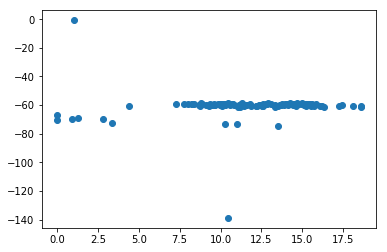

In [86]:
plt.scatter(df['sl_mean'],df['vibration_3_min'])

In [35]:
comatrix=df.corr()['Life']
co=comatrix.copy()

In [37]:
co.sort_values()


csv_no              -9.310973e-01
sl_std              -5.164442e-01
sl_max              -3.649031e-01
current_50%         -3.601369e-01
current_mean        -3.598195e-01
z_disp_mean         -3.370733e-01
z_disp_max          -3.130986e-01
vibration_1_25%     -2.648437e-01
sl_75               -2.578578e-01
z_disp_sum          -2.352731e-01
current_max         -2.303944e-01
vibration_3_25%     -2.007818e-01
vibration_2_25%     -1.985331e-01
sl_mean             -1.938982e-01
y_disp_mean         -1.846571e-01
y_disp_max          -1.833601e-01
vibration_1_50%     -1.776928e-01
vibration_1_mean    -1.690123e-01
Machine             -1.569033e-01
sl_50               -1.537962e-01
vibration_1_min     -9.791250e-02
current_std         -8.492743e-02
current_75%         -5.750921e-02
y_disp_sum          -5.588286e-02
sl_25               -4.401428e-02
z_move_count        -4.169917e-02
x_disp_max          -8.227174e-03
vibration_3_mean    -0.000000e+00
vibration_2_max      0.000000e+00
Duration      

{'whiskers': [<matplotlib.lines.Line2D at 0x255c34d0518>,
 'caps': [<matplotlib.lines.Line2D at 0x255c34d0ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x255c34d03c8>],
 'medians': [<matplotlib.lines.Line2D at 0x255c34cf710>],
 'fliers': [<matplotlib.lines.Line2D at 0x255c34cfba8>],
 'means': []}

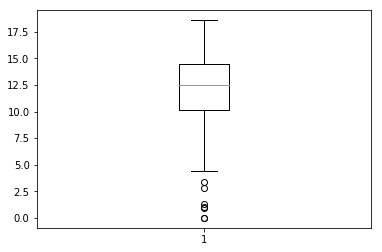

In [45]:
plt.boxplot(df['sl_mean'])

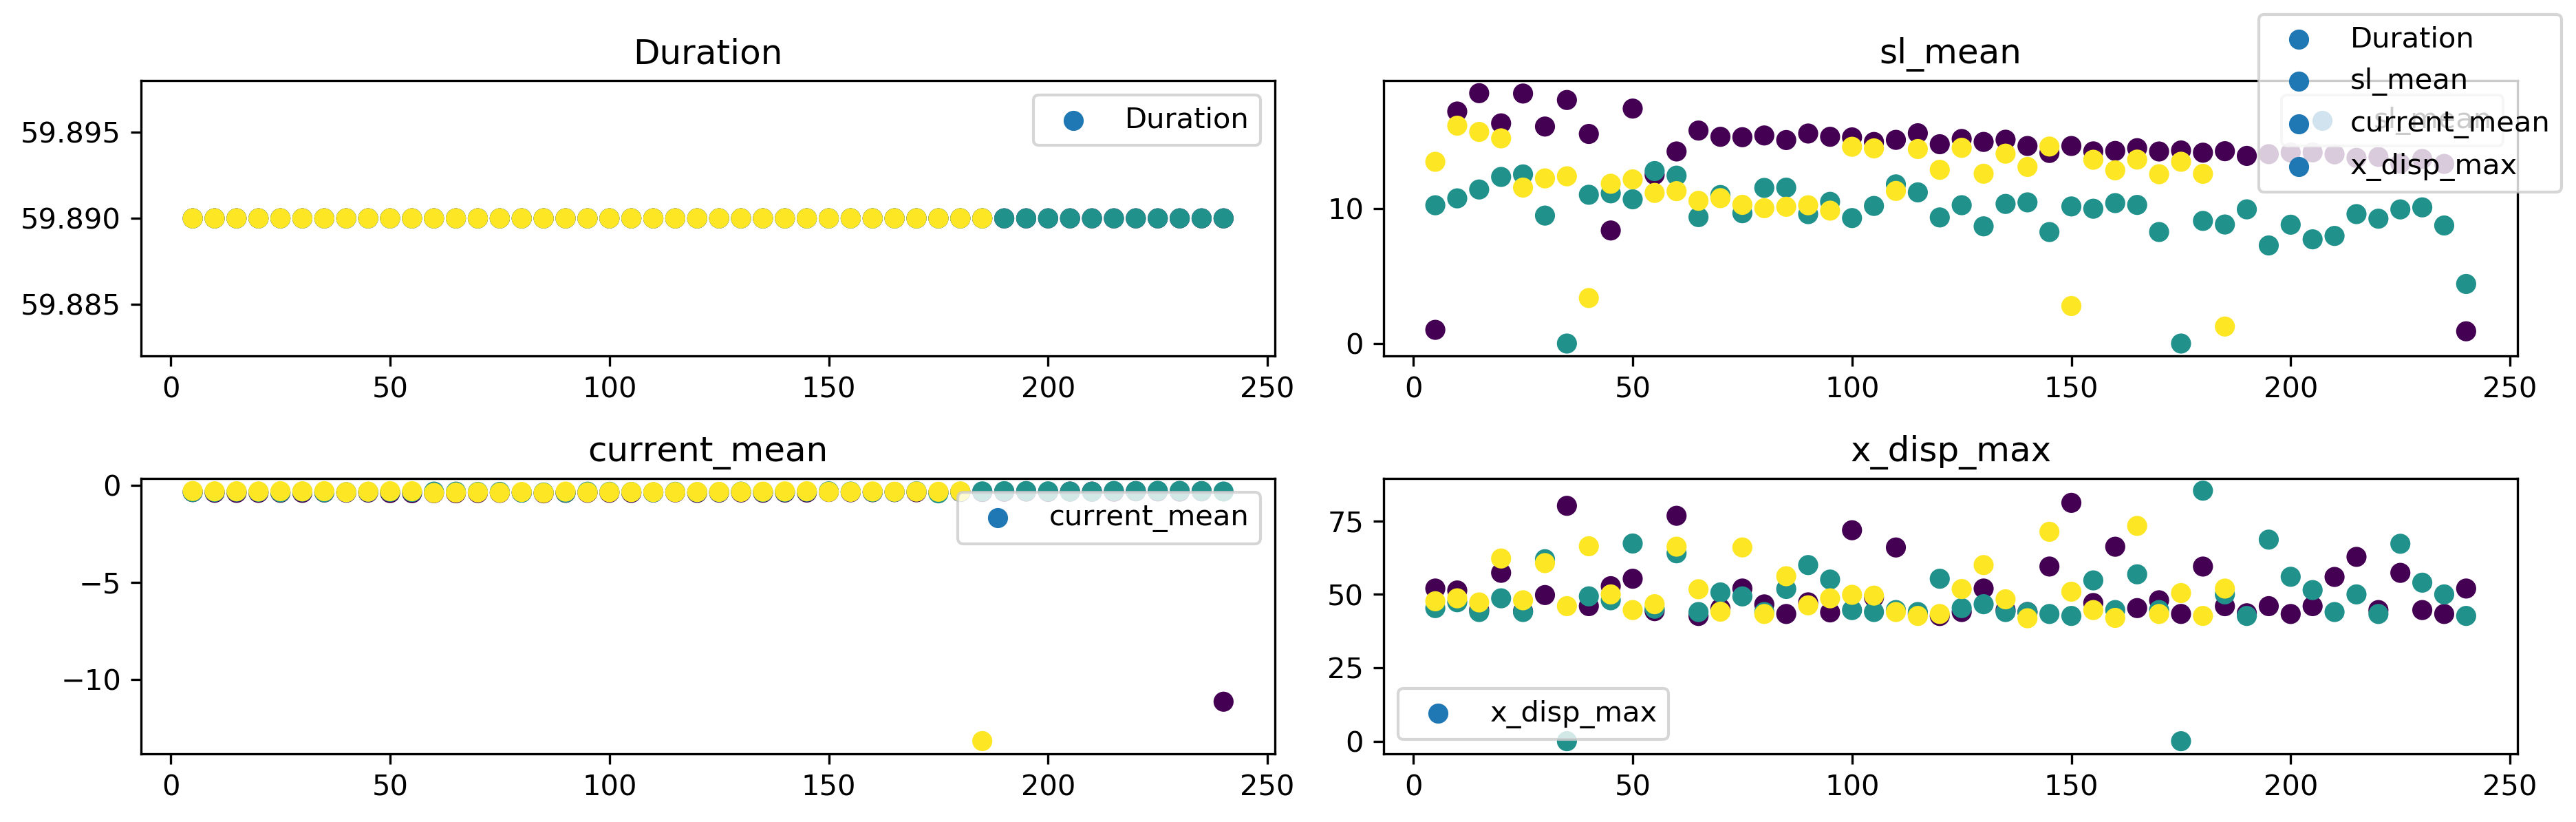

In [61]:
#测试几个比较靠谱的feature 和life之间关系
#也寻找离群值

fig,ax=plt.subplots(2,2)
ax=ax.flatten()

life=df['Life']
m=df['Machine']

n=6

ax[0].scatter(life,df.iloc[:,n],c=m)
ax[0].set_title(df.columns[n])
ax[0].legend()

n2=7

ax[1].scatter(life,df.iloc[:,n2],c=m)
ax[1].set_title(df.columns[n2])
ax[1].legend()

name='current_mean'

ax[2].scatter(life,df.loc[:,name],c=m)
ax[2].set_title(name)
ax[2].legend()

name='x_disp_max'

ax[3].scatter(life,df.loc[:,name],c=m)
ax[3].set_title(name)
ax[3].legend()


fig.legend()
fig.tight_layout()

In [98]:
df.columns

Index(['Machine', 'csv_no', 'MachineCSV', 'Life', 'Duration', 'sl_mean',
       'sl_std', 'sl_25', 'sl_50', 'sl_75', 'sl_max', 'x_disp_max',
       'x_disp_mean', 'x_disp_sum', 'y_disp_max', 'y_disp_mean', 'y_disp_sum',
       'z_disp_max', 'z_disp_mean', 'z_disp_sum', 'x_move_count',
       'y_move_count', 'z_move_count', 'vibration_1_count', 'vibration_1_mean',
       'vibration_1_std', 'vibration_1_min', 'vibration_1_25%',
       'vibration_1_50%', 'vibration_1_75%', 'vibration_1_max',
       'vibration_2_count', 'vibration_2_mean', 'vibration_2_std',
       'vibration_2_min', 'vibration_2_25%', 'vibration_2_50%',
       'vibration_2_75%', 'vibration_2_max', 'vibration_3_count',
       'vibration_3_mean', 'vibration_3_std', 'vibration_3_min',
       'vibration_3_25%', 'vibration_3_50%', 'vibration_3_75%',
       'vibration_3_max', 'current_count', 'current_mean', 'current_std',
       'current_min', 'current_25%', 'current_50%', 'current_75%',
       'current_max'],
      dtype='obj

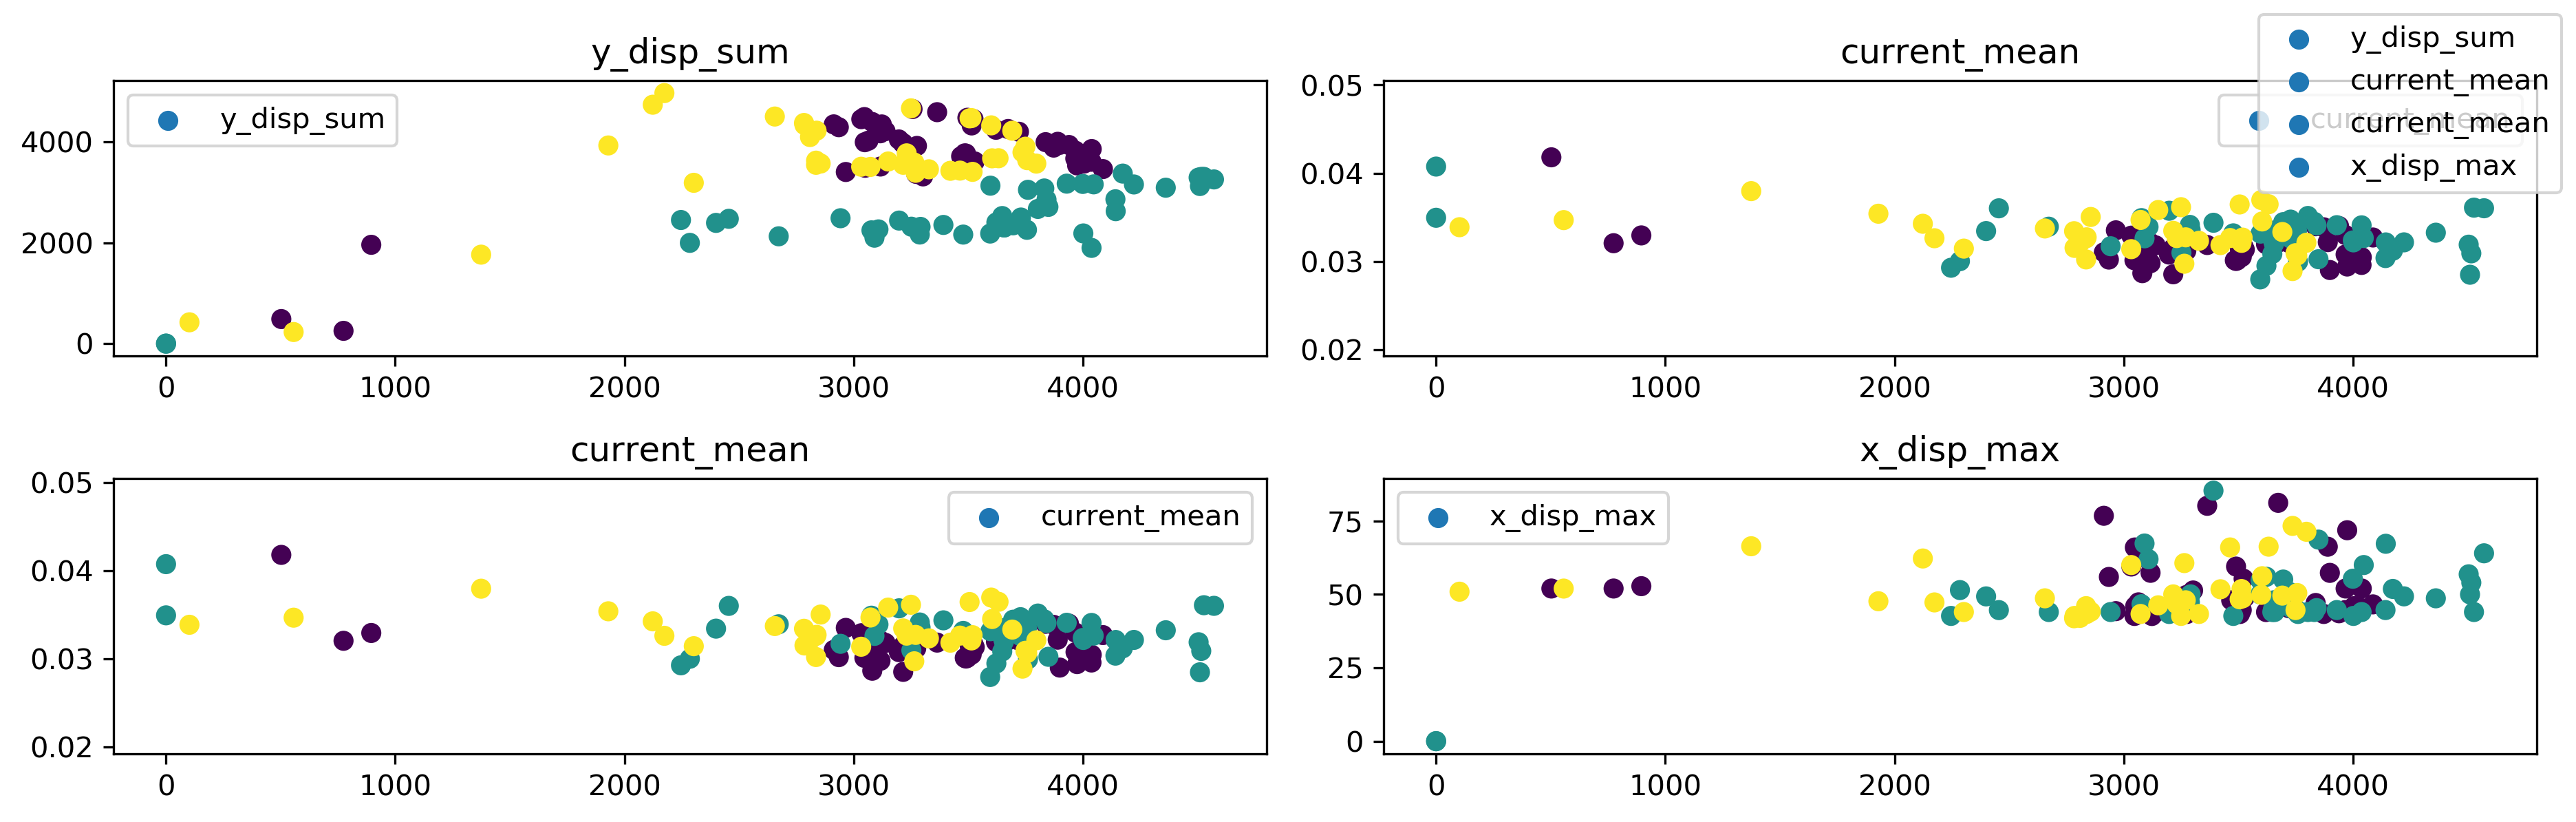

In [103]:
#探索位移和震动之间的关系

fig,ax=plt.subplots(2,2)
ax=ax.flatten()

x=df['x_disp_sum']
m=df['Machine']

name='y_disp_sum'

ax[0].scatter(x,df.loc[:,name],c=m)
ax[0].set_title(name)
ax[0].legend()

name='current_mean'

ax[1].scatter(x,df.loc[:,name],c=m)
ax[1].set_title(name)
ax[1].legend()


name='current_mean'

ax[2].scatter(x,df.loc[:,name],c=m)
ax[2].set_title(name)
ax[2].legend()

name='x_disp_max'

ax[3].scatter(x,df.loc[:,name],c=m)
ax[3].set_title(name)
ax[3].legend()


fig.legend()
fig.tight_layout()